<table>
    <tr style="border-top: 1px solid black; border-bottom: 1px solid black">
        <td>
            <h1>Analyse de Série temporelle</h1>
        </td>
    </tr>
</table>

<table>
    <tr style="border-top: 1px solid black; border-bottom: 1px solid black">
        <td>
            <h1>Nombre de passagers par mois dans les transports aériens</h1>
        </td>
    </tr>
</table>

<center><i>Réalisé par : </i>Douba JAFUNO </center>
<table>
    <tr style="text-align: center;vertical-align:left">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan du rapport</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction </h1></a><br>
           &nbsp; <a href="#generalite">I.1 Généralités sur les séries temporelles</a><br>
           &nbsp; <a href="#importation">I.2 Importation des Librairies pour la prédictions de séries temporelles</a><br>
           &nbsp; <a href="#presentation">I.3 Présentation du problème</a><br>
           &nbsp; <a href="#preparation">I.4 Préparation et Visualisation des données</a><br><br>


<a href="#2"><h1>II. Décomposition d'une série temporelle </h1></a><br><br>
    &nbsp; <a href="#tsb">II.1 Tendance, Saisonnalité et Bruit </a><br>
    &nbsp; <a href="#stat">II.2 Décomposer avec Statsmodels</a><br>

<a href="#3"><h1>III. Stationarité et Test </h1></a><br><br>
    &nbsp; <a href="#statio">III.1 Autour de la Stationnarité</a><br>
    &nbsp; <a href="#acf">III.2 Les graphiques de l'ACF et du PACF</a><br>
    &nbsp; <a href="#tra">III.3 Tracer des statistiques roulantes (Rolling Statistics)</a><br>
    &nbsp; <a href="#adf">III.4 Test ADF: Augmented Dickey-Fuller</a><br>     
        
<a href="#4"><h1>IV. Rendre les séries chronologiques stationnaires</h1></a><br><br>
    &nbsp; <a href="#tran">IV.1 Transformations</a><br>
    &nbsp; <a href="#moy">IV.2 Moyenne Mobile</a><br>
    &nbsp; <a href="#diff">IV.3 Différenciation</a><br> 
    &nbsp; <a href="#estpar">IV.4 Estimation paramétrique</a><br>
    &nbsp; <a href="#estnpar">IV.5 Estimation non-paramétrique</a><br>
        

<a href="#5"><h1>V. Prévisions avec les méthodes de lissage</h1></a><br>
    &nbsp; <a href="#ls">V.1 Le lissage exponentiel simple</a><br>
    &nbsp; <a href="#ld">V.2 Le lissage exponentiel double</a><br>
    &nbsp; <a href="#hw">V.3 La méthode de Holt-Winters</a><br>
   

<a href="#6"><h1>VI. Prévisions avec les méthodes stochastiques</h1></a><br>
    &nbsp; <a href="#ar">VI.1 Les processus AR</a><br>
        &emsp; <a href="#mqp">VI.1.1  Mesure de la qualité des prévisions</a><br>
    &nbsp; <a href="#ma">VI.2 Les processus MA</a><br>
    &nbsp; <a href="#arma">VI.3 Les processus ARMA</a><br>
    &nbsp; <a href="#arima">VI.4 Les processus ARIMA</a><br>
        &emsp; <a href="#ica">VI.4.2 Interpréter les courbes ACF</a><br>
        &emsp; <a href="#autoarima">VI.4.1 Auto Arima</a><br>
    &nbsp; <a href="#sarima">VI.5 Les processus SARIMA</a><br>
        &emsp; <a href="#autosarima">VI.5.1 Auto Sarima</a><br>
        &emsp; <a href="#sarimagri">VI.5.2 SARIMAX avec Grille</a><br>
        
<a href="#7"><h1>VII. Prévisions avec les Réseaux de Neurone Récurrent</h1></a><br>
    &nbsp; <a href="#lstm">VII.1 LSTM</a><br>
    &nbsp; <a href="#gru">VII.2 GRU</a><br>
<a href="#8"><h1>VIII. Références</h1></a><br>
    </td>
    <td style="width: 0%">
    </td>
</tr>
</table>



# <a name="1">I. Introduction</a>

## <a name="generalite"> Généralités sur les séries temporelles </a>

Une série temporelle, ou série chronologique, est une suite de valeurs numériques représentant l'évolution d'une quantité spécifique au cours du temps. De telles suites de variables aléatoires peuvent être exprimées mathématiquement afin d'en analyser le comportement, généralement pour comprendre son évolution passée et pour en prévoir le comportement futur (à l’aide de modèles issus de la physique, la statistique inférentielle, du machine learning, etc.). Une telle transposition mathématique utilise le plus souvent donc des concepts de probabilités et de statistique.

Les outils à disposition du statisticien trouvent leurs sources dans trois phases historiques :

1) La représentation graphique : les diagrammes apparaissent en astronomie, le plus ancien connu remontant au 10ème siècle.


2) Les techniques temporelles déterministes (en opposition aux techniques probabilistes) : elles apparaissent aux 18ème et 19ème siècles, on distingue deux voies très importantes :

- L’analyse fréquentielle d’une série temporelle : un signal est approché par une
somme de sinusoıdales (analyse de Fourier).

- La décomposition d’une série temporelle en composantes tendancielle, cyclique,
saisonnière et accidentelle.

- La correction des variations saisonnières d’une série temporelle, qu’on étudiera, repose sur cette décomposition.

3) Les méthodes stochastiques (ou probabilistes) tel que AR, MA et ARMA : elles émergent au 20ème siècle, et ont connu depuis un véritable essor.

4) Et enfin les méthodes de Deep learning que nous verrons aussi.

De nombreuses séries économiques présentent des comportements périodiques, rendant difficile la comparaison de deux instants successifs. On traite ainsi fréquemment de séries trimestrielles (ex : taux de croissance) ou mensuelles (ex : taux de chômage). On fait alors appel à une désaisonnalisation permettant d'obtenir des séries dites corrigées des variations saisonnières (CVS)

Les méthodes couramment employées pour désaisonnaliser une série temporelle sont la régression linéaire et les filtres moyennes mobiles qu'on retrouve dans des algorithmes tels que Tramo-Seats et la famille des Xnum ou Xnum-ARIMA.

En résumé 

Série chronologique
- Une série temporelle est un ensemble séquentiel de points de données, mesurés généralement sur des périodes successives.
- Elle est mathématiquement définie comme un ensemble de vecteurs $X_t$, t = 0,1,2,... où t représente le temps écoulé.
- La variable $X_t$ est traitée comme une variable aléatoire.
- Les mesures prises au cours d'un événement dans une série temporelle sont classées dans un ordre chronologique approprié.
- Une série chronologique contenant des enregistrements d'une seule variable est dite univariée, et plus d'une variable est dite multivariée.

**Cas d'utilisation par les entreprises des prévisions de séries chronologiques**
- Prévisions de ventes 
- Prévisions de ventes de produits au détail
- Prévision de la demande 
- utilisée pour la fixation des prix, la gestion des stocks et de la main-d'œuvre
- Prévision du trafic 
- Optimisation des transports et des itinéraires, conception des installations routières
- Prévisions de recettes 
- Budgétisation, fixation d'objectifs

## <a name="importation"> Importation des Librairies pour la prédictions de séries temporelles </a>

In [1]:
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


from math import sqrt

import matplotlib

import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

## <a name="presentation"> Présentation du problème </a>

Notre Projet de série temporelle porte sur les données classiques de la compagnie aérienne Box & Jenkins. Totaux mensuels des passagers aériens internationaux de 1949 à 1960.

Nos données se répartissent en 144 lignes et deux colonnes:
- l'année 
- le nombre de passagers correspondant 

Ce jeux de donnée est très intérrésant c'est un classique il nous permettra de traiter en larges l'analyse des séries temporelles du fait que la série temporelle n'est avant tout pas **stationnaire** terme que l'on définira dans la suite.

## <a name="preparation"> Préparation et Visualisation des données </a>

In [2]:
df = pd.read_csv('Données/international-airline-passengers.csv',header=None)

Tout d'abord on nomme les 2 colonnes annee et passagers 

In [3]:
df.columns = ['annee','passagers']
df.head(3)

,annee,passagers
0,1949-01,112
1,1949-02,118
2,1949-03,132


Deescription de notre jeu de donnée

In [4]:
df.describe()

,passagers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Taille du jeu de données

In [5]:
df.shape

(144, 2)

On peut aussi vissionner la première et la dernière date

In [6]:
print('Date de début: {}\nDate de fin : {}'.format(df.annee.min(),df.annee.max()))

Date de début: 1949-01
Date de fin : 1960-12


Grace à la commande pd.to_datetime de pandas on peut faire une conversion au format date-heurede la colonne **annee**.

In [7]:
df['annee'] = pd.to_datetime(df['annee'], format='%Y-%m')

Définition de y:correpondant à nos donnée **passagers** ou l'indice comme colonne date-heure correspond à la colonne **annee** pour faciliter les manipulations :

In [8]:
x = df.set_index('annee')

In [9]:
x.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='annee', length=144, freq=None)

On regarde désormais si y n'a pas de valeur manquante et c'est le cas. 

In [10]:
x.isnull().sum()

passagers    0
dtype: int64

On peut désormais visulaiser nos données **passagers**.

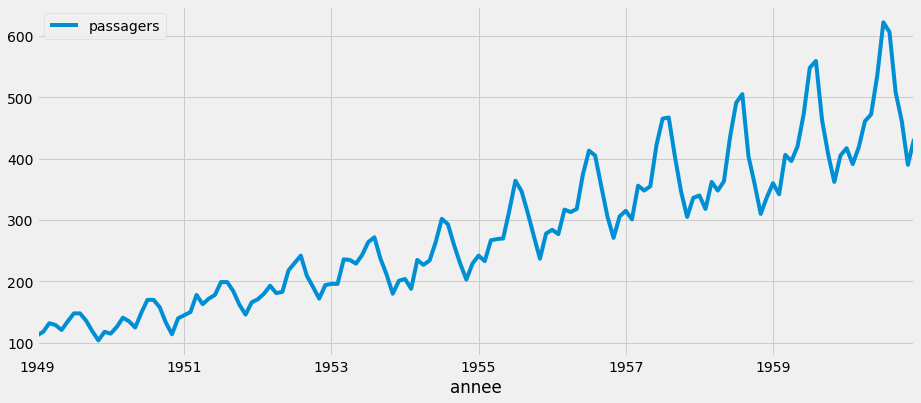

In [11]:
x.plot(figsize=(14, 6))
plt.savefig('airpassenger.png')
plt.show()

Histogramme et densité de nos données

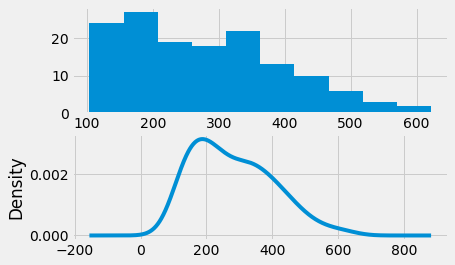

In [12]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
x.passagers.hist()
pyplot.subplot(212)
x.passagers.plot(kind='kde')
pyplot.show()

On remarque que la distribution de nos donnée n'est pas parfaitement gaussienne (distribution normale) en effet elle est décalée à gauche et n'est donc pas symétrique.

Boxplot

<AxesSubplot:xlabel='annee', ylabel='passagers'>

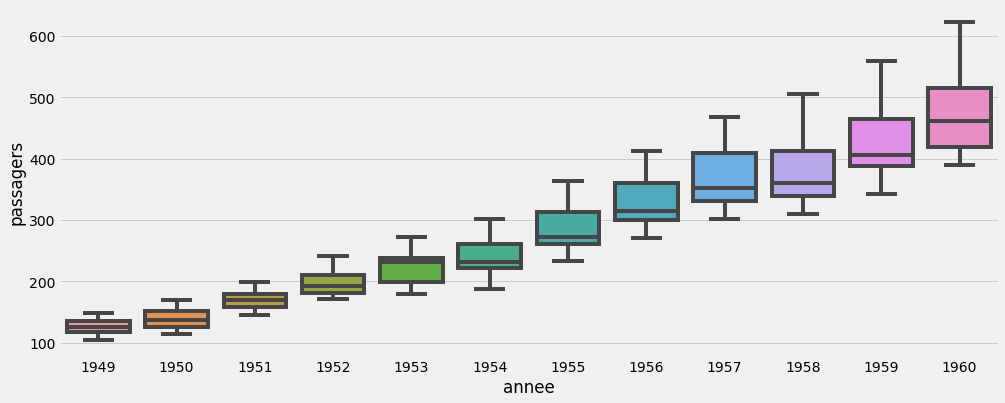

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x.passagers.index.year, x.passagers, ax=ax)

Nous pouvons voir que les valeurs médianes sur plusieurs années confirment une tendance à la hausse nous avons une 
Augmentation régulière du nombre de passagers au fil du temps.
Un modèle tenant compte de la **saisonnalité**  pourrait bien fonctionner

 # <a name="2">II. Décomposition d'une série Temporelle</a> 

## <a name="tsb"> Tendance, Saisonnalité et Bruit  </a>

Une série temporelle $X_t$ est communément décomposée en **tendance**, **saisonnalité**, **bruit** et éventuellement d'un cycle qu'on ne prendra pas en compte ici: 
\begin{align}
X_t = T_t+S_t+\varepsilon_t\nonumber
\end{align}

1) **La tendance $T_t$** correspondant à une évolution à long terme de la série elle traduit le niveau moyen de la série temporelle, il s'agit d'une direction générale dans laquelle quelque chose se développe ou change au fil du temps il peut s'agir par exemple d'une évolution décroissante ou croissante:


- tendance linéaire: $T_t=a+bt$
- tendance quadratique: $T_t=a+bt+ct^2$
- tendance logarithmique: $T_t=\log(t)$



2) **La saisonnalité $S_t$** correspond à un phénoméne périodique de période identifiée qui est **centrée et de moyenne nul**.

3) **L’erreur (le bruit ou parfois le résidu) $\varepsilon_t$** qui est la partie aléatoire et inexpliquée  de la série temporelle qui suit une loi normale.


Le but cette décomposition est de se ramener à un bruit $\varepsilon_t$ stationnaire. Cette **décomposition** pouvant être **additive**, **multiplicative** $Y_t = T_t*S_t*\varepsilon_t$ ou des combinaisons des deux:

\begin{align}
Y_t = (T_t+S_t)*\varepsilon_t\nonumber
\end{align}
\begin{align}
Y_t = (T_t*S_t)+\varepsilon_t\nonumber
\end{align}

Le choix de cette décomposition se fait au regard de l'évolution de la série temporelle 
si l'écart entre les creux et les pics de la série temporelle augmente au cours du temps il s'agira d'un modèle multiplicative et si cette écart reste stable au cours du temps il s'agira d'un modèle additif. regardons donc les données **Air Passengers** 



<img src="airpassenger.png" style="width:500px;height:228px;">

Nous voyons clairement que l'écart entre les creux et les pics de la série temporelle augmente au cours du temps **il s'agit donc d'un modèle multiplicatif**, de plus la figure ci dessus montre une **forte tendance à la hausse, avec une forte saisonnalité**. Il n'y a aucune preuve d'un comportement cyclique ici. On essayera toujours de **rendre notre modèle additif** plutot que multiplicatif, plusieurs méthodes peuvent etre vu comme **une transformation logarithmique** par exemple. 

**A noter qu'une série temporelle présentant une tendance et/ou une saisonnalité ne pourra pas être modélisée par un processus stationnaire dont on verra la définition dans la partie suivante, il est donc nécessaire de déssaisonnaliser une série temporelle afin de retirer sa tendance et/ou sa saisonnalité.** 

## <a name="stat"> Décomposer avec statsmodels </a> 

Nous pouvons utiliser statsmodels pour effectuer une décomposition de notre série temporelle et visualiser les 3 courbes correspondant à la tendance (Trend)  la saisonnalité (Seasonal) et le résidu (Resid).

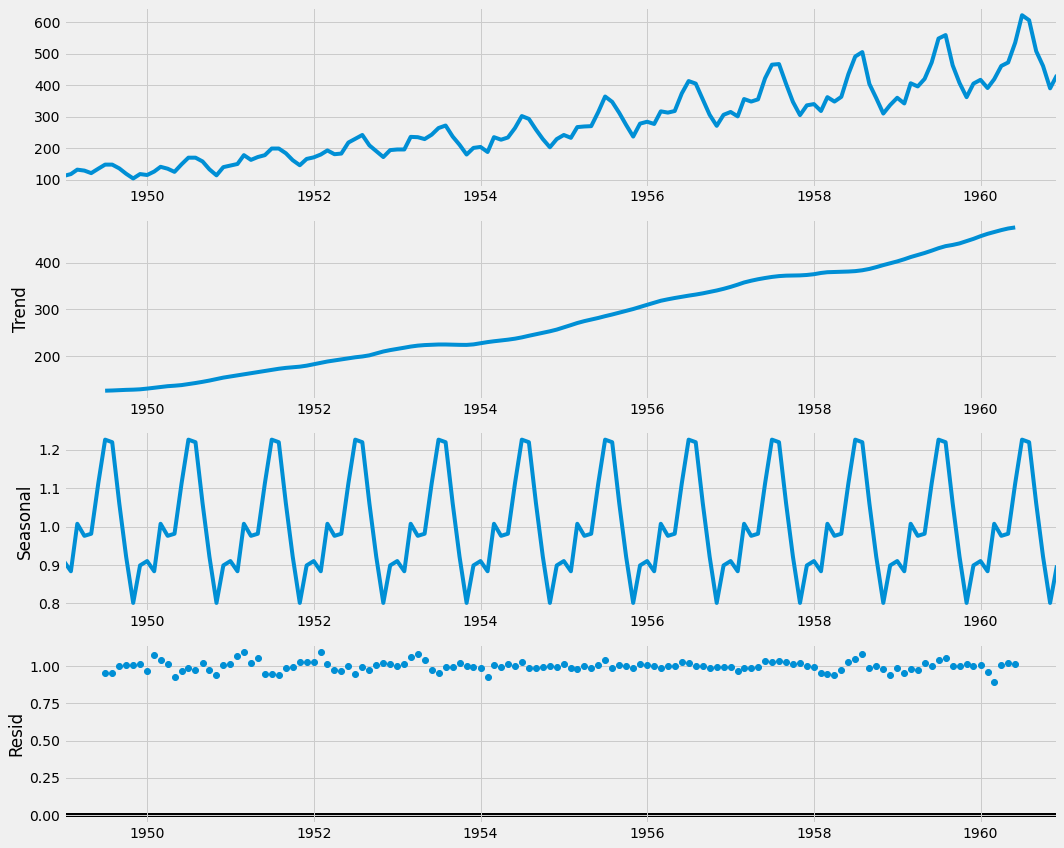

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
decomposition = sm.tsa.seasonal_decompose(x, model='multiplicative')  # car le modèle est multiplicatif
fig = decomposition.plot()
plt.show()

On peut aussi vérifier la normalité des résidus 

histogramme 

<AxesSubplot:>

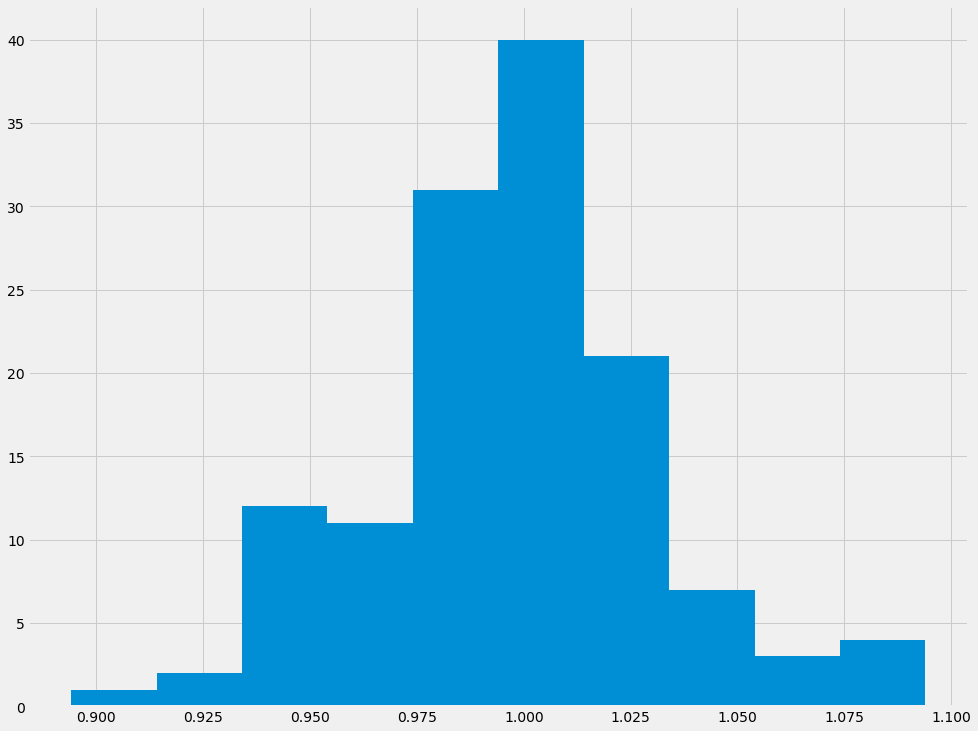

In [15]:
decomposition.resid.hist()

l'histogramme est à peu près symétrique c'est bon signe 

Utilisons stats.normaltest pour tester la normalité

Cette fonction teste l'hypothèse nulle qu'un échantillon provient d'une distribution normale. Il est basé sur le test de D'Agostino et Pearson qui combine le biais et le kurtosis pour produire un test omnibus de normalité.

In [16]:
from scipy import stats
k2, p = stats.normaltest(decomposition.resid.dropna())
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha: 
    print("l'hypothèse nulle peut etre rejeté, la distribution ne semble pas etre normale ")
else:
    print("l'hypothèse nulle ne peut pas etre rejeté la distribution semble normale ")


p = 0.109738
l'hypothèse nulle ne peut pas etre rejeté la distribution semble normale 


# <a name="3">III. Stationarité et Test </a> 

## <a name="statio">  Autour de la Stationnarité </a>  

Soit un processus aléatoire $(X_t)_{t \in \textbf{Z}}$, il est dit **stationnaire au sens fort** (ou strictement) si pour toute fonction f mesurable 
$f(X_1,X_2,...,X_t)$ et $f(X_{1+h}, X_{2+h}, ..., X_{t+h})$ ont la même loi. Cette notion de stationnarité forte est très difficile à vérifier en pratique. On lui préfère généralement la notion de stationnarité faible qui porte sur les moments d’ordre 1 et 2 du processus.

Soit un processus aléatoire $(X_t)_{t \in \textbf{Z}}$ tel que $E(X_t^2) < \infty$, il est dit **stationnaire au sens faible (ou d’ordre 2)** si son espérance est constante et ses auto-covariances sont stables dans le temps ie:
$\forall t \quad E(X_t)= \mu$
$\forall t \quad, \forall h  \quad \text{Cov}(X_t, X_{t+h})= \gamma(h)$

On remarque que $\text{var}(X_t)=\gamma(0)$ et donc qu’un processus stationnaire faible à une variance constante dans le temps.


- En pratique, pour apprécier la stationnarité d’un processus, on commence d’abord par vérifier que sa moyenne et sa variance sont constantes dans le temps.

- Intuitivement, on peut dire que si une série temporelle a un comportement particulier dans le temps, il y a une très forte probabilité qu'elle suive le même chemin dans le futur. 
- En outre, les théories relatives aux séries stationnaires sont plus matures et plus faciles à mettre en œuvre que les séries non stationnaires **on cherchera toujours à faire en sorte que notre série soit stationnaire.**

La **fonction d’auto-covariance** d’un processus $X_{t \in \textbf{Z}}$ est $\text{Cov}(X_t, X_{t+h})= \gamma(h)$

La **fonction d’auto-corrélation** d’un processus $X_{t \in \textbf{Z}}$ est $\rho(h)=\operatorname{Corr}\left( X_{t},X_{t-h}\right)= \gamma(h)/\gamma(0)$, de plus $\gamma(h)$ et $\rho(h)$ sont des fonctions symétriques avec $\rho(0)=1$.



L'autocorrélation (ou l'autocovariance) d'une série fait référence au fait que dans une série temporelle ou spatiale, la mesure d'un phénomène à un instant t peut être corrélée aux mesures précédentes (au temps t − 1, t − 2, t − 3, etc.) ou aux mesures suivantes (à t + 1, t + 2, t + 3, ...). Une série autocorrélée est ainsi corrélée à elle-même, avec un décalage (lag) donné.

Soit une série d’observations $(x_t)_{t \in (1,...,n)}$, notons $\bar{x}=\frac{1}{n} \sum_{t=1}^n x_t$, alors pour tout $h \in (0,...,n-1)$ 

**la fonction d’auto-covariance empirique** vaut: $\widehat{\gamma}(h)= \frac{1}{n-h} \sum_{t=h+1}^n (x_t-\bar{x})(x_{t-h}-\bar{y})$ 

**la fonction d’auto-corrélation empirique** vaut, pour tout $h \in (0,...,n-1)$: $\widehat{\rho}(h)= \frac{\frac{1}{n-h}  \sum_{k=h+1}^n (y_t-\bar{y})(y_{t-h}-\bar{y})}{\frac{1}{n}\sum_{t=1}^n (y_t-\bar{y})^2}$

Le graphique représentant la fonction d’auto-corrélation empirique est appelé **l’auto-corrélogramme**  ou **ACF** .


Auto-corrélation partielle
Lorsque l’on s’intéresse à caractériser les dépendances d’au moins 3 variables aléatoires, il est nécessaire d’introduire la notion de **corrélation partielle**. En effet, si l’on considère les variables $X_1,...,X_k$, $X_1$ peut être corrélée à $X_3$ parce que $X_1$ et $X_3$ sont toutes deux corrélées à $X_2$.

Définition soit un processus aléatoire $(X_t)_{t \in \textbf{Z}}$ stationnaire faible centré. La fonction d’auto-corrélation partielle est définie de la manière suivante:
	
\begin{align}
   r(1)  &= \rho(1) \nonumber \\
   r(h)  &=\operatorname{Corr}\left( X_{t},X_{t-h}\left/ X_{t-1},\ldots,X_{t-h+1}\right.\right) , \forall h \geq 2 \nonumber \\
   r(h) & = r(-h)  \nonumber
\end{align}

L'autocorrélation partielle permet de mesurer l'autocorrélation d'un signal pour un décalage k "indépendamment" des autocorrélations pour les décalages inférieurs.

Le graphique représentant la fonction d’auto-corrélation partielle empirique est appelé **l’auto-corrélogramme partielle empirique**  ou **PACF** .

Exemple de Série Stationnaire

- Le bruit blanc $\varepsilon_t$ vérifiant $E(\varepsilon_t)=\mu$ et $\text{var}(\varepsilon_t)=\sigma^2$
et on a par définition $\text{cov}(\varepsilon_t,\varepsilon_{t+h})=0$

- Le processus gaussien $(X_t)_{t \in \textbf{Z}}$ tel que $E(X_t)=\mu$ et $\text{cov}(X_t,X_{t+h})=\alpha^{|h|}$($|\alpha|<1$) est faiblement stationnaire. Tout processus gaussien stationnaire faible est stationnaire fort.


On  appelle opérateur retard $L$ l’opérateur qui associe à un processus $(X_t)_{t \in \textbf{Z}}$ le processus $(Y_t)_{t \in \textbf{Z}}$ tel que $Y_t=LX_t=X_{t-1}$.

Cet opérateur est: 

- linéaire inversible: son inverse est $L^{-1}=F$ tel que $FX_t=X_{t+1}$ et est appelé l’opérateur avance
De plus on a: $L^nX_t=X_{t-n}$ et $(\sum_{i=1}^p a_iL^i)X_t=\sum_{i=1}^p a_i X_{t-i}$ séries en $L$ on peut définir à l’aide de cet opérateur des séries en $L$ (ou $F$). 

- Soit un processus stationnaire $(X_t)_{t \in \textbf{Z}}$ et une suite $(a_i)_{i \in \textbf{Z}}$ de nombres réels absolument sommable $\sum_{i \in \textbf{Z}} |a_i|<\infty$, alors le processus défini par: $Y_t= \sum_{i \in \textbf{Z}} a_i X_{t-i}=(\sum_{i \in \textbf{Z}} a_i L^i) X_{t}$ est stationnaire.



**Nous savons déja que notre série présente une tendance et une saisonnalité et qu'elle n'est donc pas stationnaire cependant nous pouvons vérifier la stationnarité en utilisant ce qui suit** :

- **Graphiques ACF et PACF** : Si la série temporelle est stationnaire, les graphiques ACF/PACF montreront une chute rapide de la corrélation après un léger décalage entre les points.
- **Tracé des statistiques roulantes (Rolling Statistic)** : Nous pouvons tracer [la moyenne mobile](#moyenne_cell) ou la variance mobile et voir si elle varie avec le temps. La moyenne mobile/variance est pour tout instant 't', la moyenne/variance de l'année dernière, c'est-à-dire des 12 derniers mois (paramètre windows = 12).
- **Test de Dickey-Fuller augmenté** : Il s'agit d'un des tests statistiques permettant de vérifier la stationnarité. Ici, l'hypothèse nulle est que le TS n'est pas stationnaire. Les résultats du test comprennent une statistique de test et quelques valeurs critiques pour les niveaux de confiance des différences. Si la "statistique de test" est inférieure à la "valeur critique", nous pouvons rejeter l'hypothèse nulle et dire que la série est stationnaire. Ce test s'appuie sur le fait qu'on sait qu'un modèle est non-stationnaire si il a une racine unitaire

## <a name="acf"> Les graphiques de l'ACF et du PACF </a> 


- Passons en revue les graphiques de la fonction d'autocorrélation (ACF) et de la fonction d'autocorrélation partielle (PACF)
- Si la série temporelle est stationnaire, les graphiques ACF/PACF montreront une rapide chute de corrélation après un petit décalage entre les points.


Utilisons statsmodels

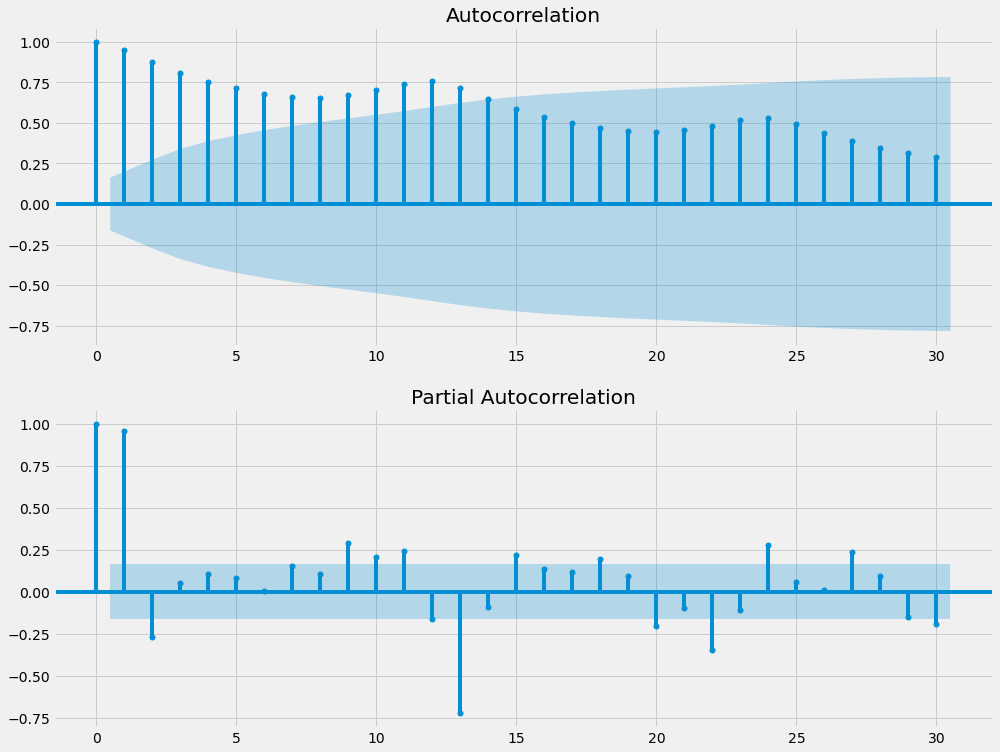

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(x.passagers, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(x.passagers, ax=pyplot.gca(), lags = 30)
pyplot.show()

- Sur le graphique **Autocorrelation**  
   - La zone bleu ciel sur le graphique issu de la fonction "acf": **Autocorrelation**  correspond à un intervalle de confiance de 95% '(les bandes autour de 0 sont d'ordonnées ±1.96/√144 ou 144 correspond auc nombre de lignes de nos donnée notre taille d'échantillons n ) ce qui suggère que les valeurs de corrélation en dehors de cet intervalles sont très probablement en auto-corrélation significatif celà nous indique le seuil critique au-delà duquel l'autocorrélation est considérée significative c'est à dire jusqu'au lag 14.
   -  De plus il n'y a pas de convergence vers 0 
  
- Sur le graphique **Partial Autocorrelation**   
   - Ces données ne sont pas stationnaires car un grand nombre d'observations antérieures sont corrélées avec des valeurs futures surle graphique issu de la fonction "pacf": **Partial Autcorrelation**.
   - L'autocorrélation partielle au décalage k est la corrélation qui résulte après avoir supprimé l'effet de toute corrélation due aux termes à des décalages plus courts.

## <a name="tra"> Tracer des statistiques roulantes (Rolling Statistics) </a> 


Tracer [la moyenne mobile](#moyenne_cell) ou la variance mobile 

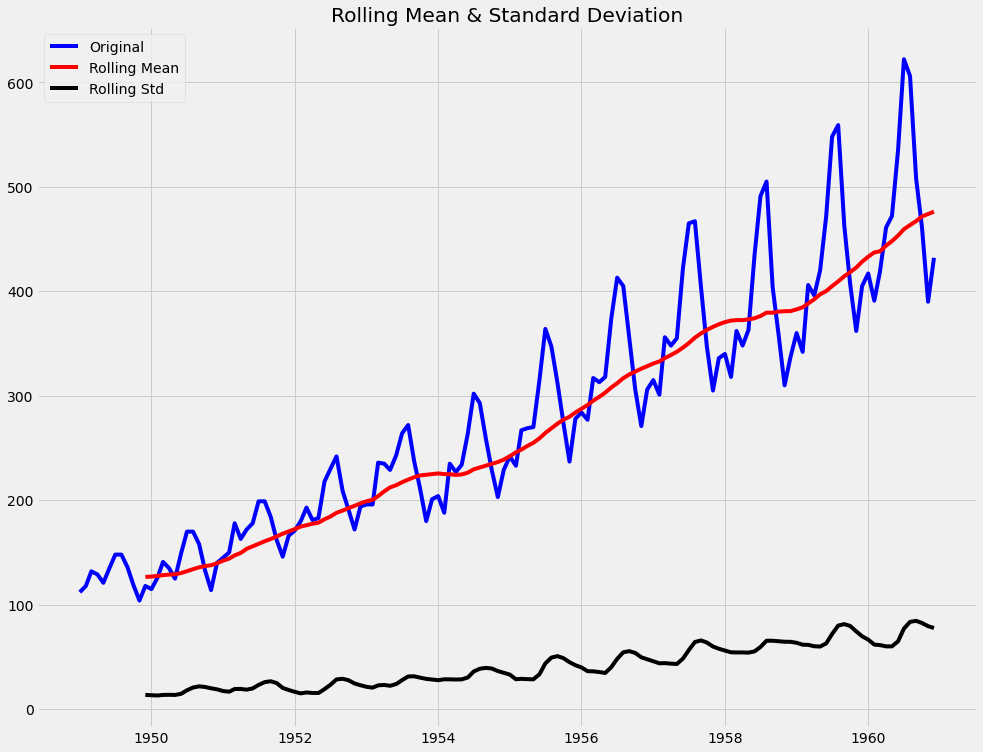

In [18]:
#Determing rolling statistics
rolmean = x.rolling(window=12).mean()      
rolstd = x.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(x, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)



- On observe que la moyenne mobile (voir partie suivante) et l'écart-type ne sont pas constants par rapport au temps (tendance croissante) 
- La série chronologique n'est donc pas stationnaire

## <a name="adf"> Test ADF: Augmented Dickey-Fuller </a> 

Toutes les méthodes dont nous avons parlé ne sont que des opérations de visualisation ou de calcul de statistiques standard. Le test ADF est un test statistique et ces types de tests peuvent fournir la preuve que votre série chronologique est stationnaire ou non. Le test ADF vérifie la stationnarité en utilisant une hypothèse. On peut accepter ou rejeter cette hypothèse.

- Hypothèse nulle - L'hypothèse nulle est acceptée et elle suggère que la série temporelle est non stationnaire.
- Hypothèse alternative : L'hypothèse nulle est rejetée et elle suggère que la série temporelle est stationnaire.


Pour savoir si nous devons accepter ou rejeter une hypothèse nulle, il faut fixer un seuil qui est fonction de la valeur p du test ADF. En général, la valeur seuil est de 5%.

- Valeur p < 0,05 - Hypothèse nulle rejetée et série temporelle stationnaire.
- Valeur p > 0,05 - Hypothèse nulle acceptée et la série temporelle est non stationnaire.

Appliquons les statistiques ADF à notre ensemble de données airpassengers.



In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


- La série chronologique n'est donc pas stationnaire

**Pour la suite on définit une fonction check_stationarity qui regroupe le tracer des statistiques roulantes et le test ADF.**

In [20]:
def check_stationarity(timeseries,rstd='t'):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()      
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    if rstd=='t':
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
    else:
        plt.legend(loc='best')
        plt.title('Rolling Mean')
        plt.show(block=False)
    
   
    #Perform Dickey-Fuller test:
    
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1]) 
    print('Critical Values:') 
    for key, value in result[4].items(): 
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

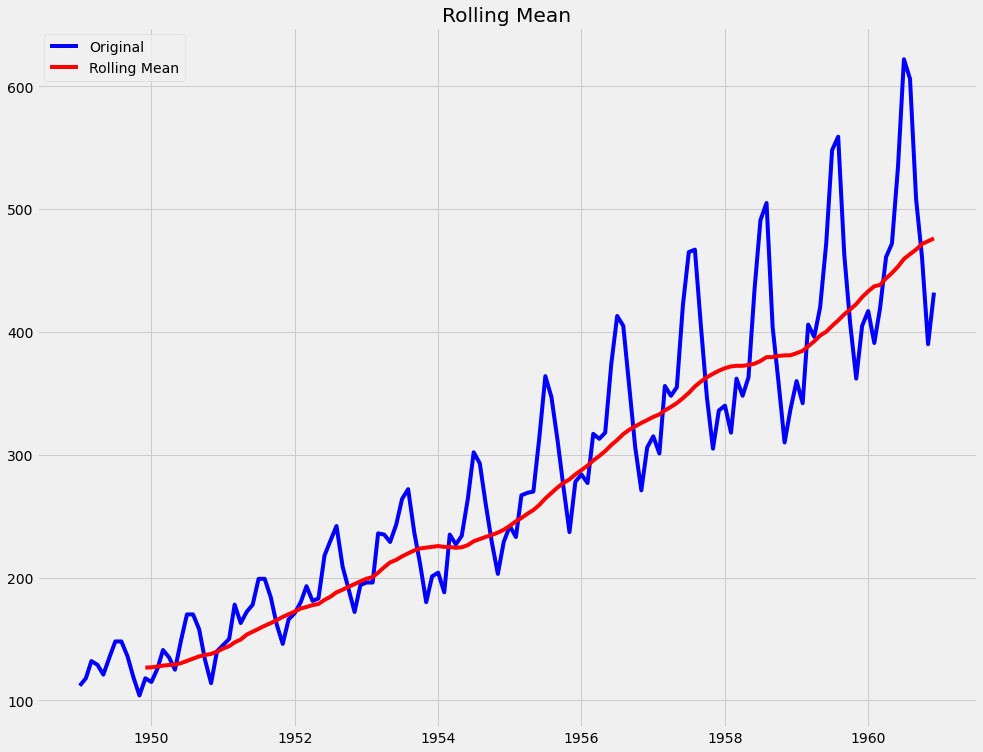

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [21]:
check_stationarity(x,rstd='f')

# <a name="4">IV. Rendre les séries chronologiques stationnaires</a> 
Deux raisons majeures expliquent la non-stationnarité d'une série temporelle :

1. Tendance

2. Saisonnalité

il nous faut donc des procédés permettant d’analyser puis/ou de corriger la tendance et\ ou la saisonnalité d’une série temporelle. Voire meme des procédés nous permettant de les supprimers

## <a name="tran"> Transformations</a> 

- Nous pouvons appliquer des transformations qui pénalisent davantage les valeurs élevées que les valeurs plus faibles, celà peut transformer un modèle multiplicatif en un modèle addidif. Il peut s'agir de prendre un logarithme, une racine carrée, une racine cubique, etc. Prenons ici une transformation logarithmique pour plus de simplicité on considère $Y_{t}=ln(X_{t})$ . On travaille en effet sur le logarithme de la série afin de pallier l’accroissement de la saisonnalité. On passe ainsi d’un modèle multiplicatif à un modèle additif.:

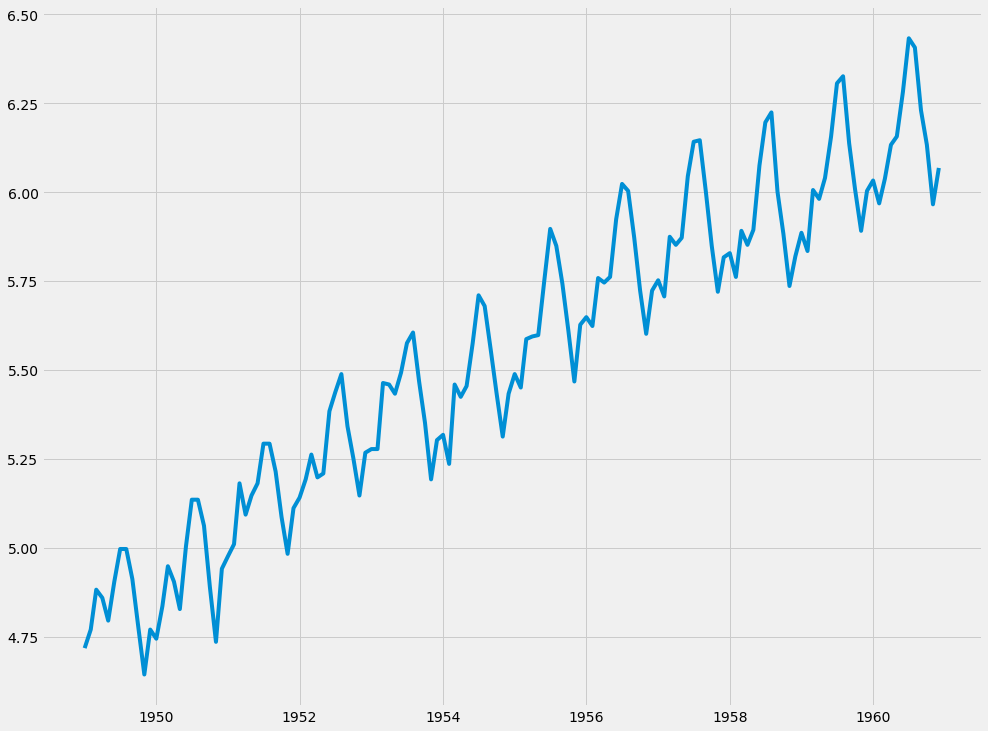

In [22]:
y = np.log(x)
plt.plot(y)

**L'écart entre les creux et les pics de la série temporelle reste stable au cours du temps il s'agit donc ici d'un modèle additif. Nous avons transformer notre série en un modèle additif nous travaillerons maintenant pour la suite avec cette série**

Autres transformations possibles :

- Transformation exponentielle
- La transformation de Box Cox
- Transformation de la racine carrée

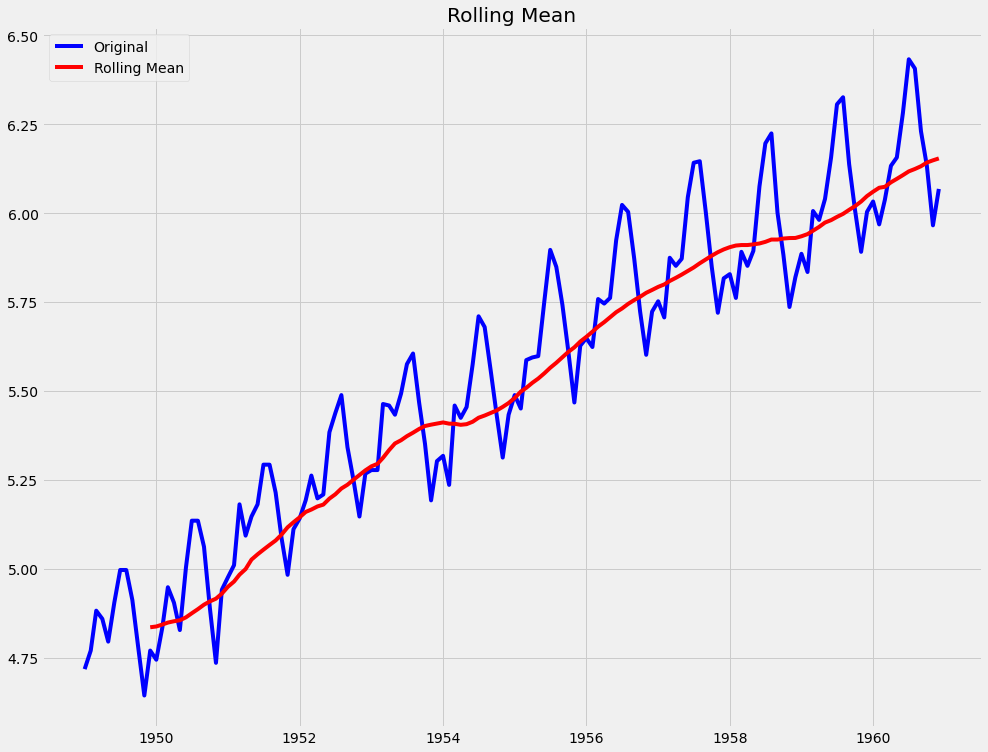

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [23]:
check_stationarity(y,rstd='f')

Notre modlèle logarithmique additif n'est pas stationnaire (pour le test !)

<a id='moyenne_cell'></a>
## <a name="moy"> Moyenne mobile</a> 

Une moyenne mobile M  est une combinaison linéaire d'instants passés et futurs de la série temporelle : 
\begin{align}
MX_{t}=\theta_{-m_{1}}X_{t-m_{1}}+\ldots+\theta_{-1}X_{t-1}+\theta_0X_{t}+\theta_{1}X_{t+1}+\ldots+\theta_{m_{2}}X_{t+m_{2}}.
\end{align}

où les coefficients $(\theta_{-m_{1}},\ldots,\theta_{m_{2}})$  sont tous des réels.

Notons d'ores et déjà que le produit de deux moyennes mobiles $M_{1}$ et $M_{2}$,  $(M_{1}M_{2}=M_{1}\circ M_{2})$  est commutatif, associatif et distributif par rapport à l'addition. Cette propriété nous indique notamment que si l'on doit appliquer plusieurs moyennes mobiles sur une série temporelle, l'ordre d'application est indifférent.

- La moyenne mobile est une méthode simple permettant **d’extraire les composantes basses fréquences d’une série temporelle autrement dit sa tendance**. Elle est également connue comme une méthode de lissage car elle agit comme un filtre passe bas et donc élimine le bruit. Le calcul de la moyenne mobile dépend d’un paramètre $l$ appelé la largeur de fenêtre. Ce paramètre correspond au nombre d’observations inclues dans le calcul de la moyenne glissante éffectuée. Plus $l$ est grand plus le lissage est important (jusqu’à atteindre la fonction constante égale à la moyenne). La moyenne mobile simple se calcule ainsi: $\widehat{x_t}= \frac{1}{p} \sum_{i=t-l}^{t+l} x_t$  avec $p = 2l+1$ à noter qu'il éxiste d'autre type de moyenne mobile avec p = 2l par ewxemple etc... 

- **En choisissant un paramètre de fenêtre $l$ égal à la période de la série, permet de désaisonnaliser une série.** En effet, par définition, la composante périodique est d’intégrale nulle sur la période.

Dans notre cas 

- Nous prenons la moyenne de **k** valeurs consécutives en fonction de la fréquence des séries chronologiques. 
- Ici, nous pouvons prendre la moyenne sur la dernière année, c'est-à-dire les 12 dernières valeurs. 
- Un inconvénient de cette approche particulière est que la période de temps doit être strictement définie. 

Tracons la moyenne mobile et notre série logarithmique y

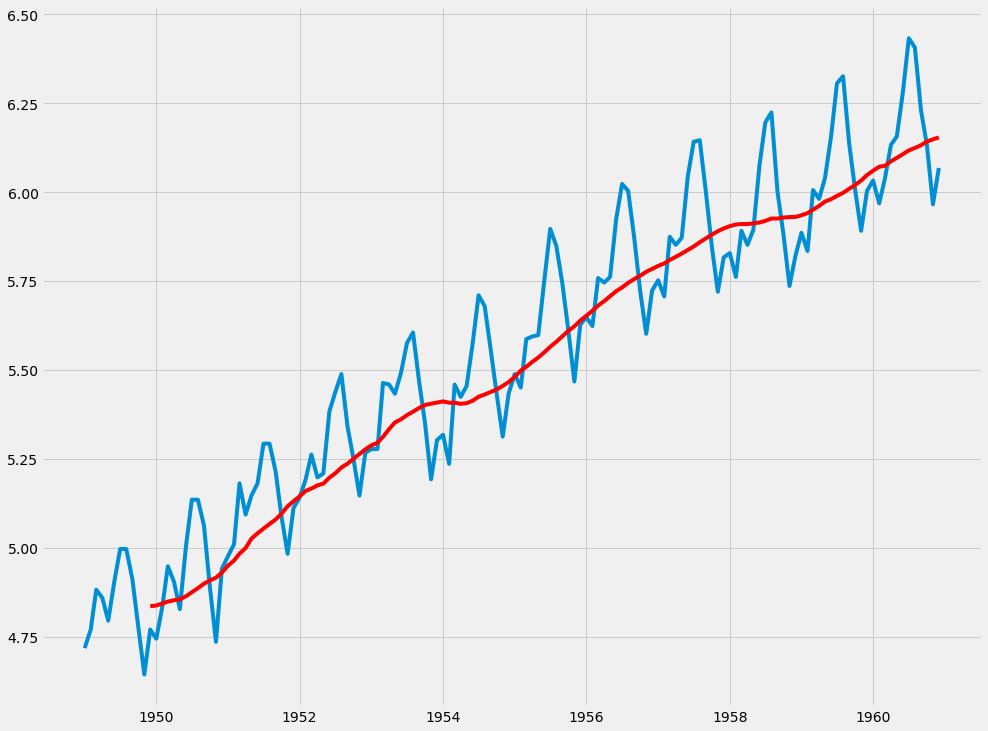

In [24]:
moving_avg = y.rolling(window=12).mean()    
plt.plot(y)
plt.plot(moving_avg, color='red')

On Obtient une nouvelle série temporelle en soustrayant notre série y à sa moyenne mobile.

In [25]:
y_moving_avg_diff = y.passagers - moving_avg.passagers
y_moving_avg_diff.head(12)

annee
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: passagers, dtype: float64

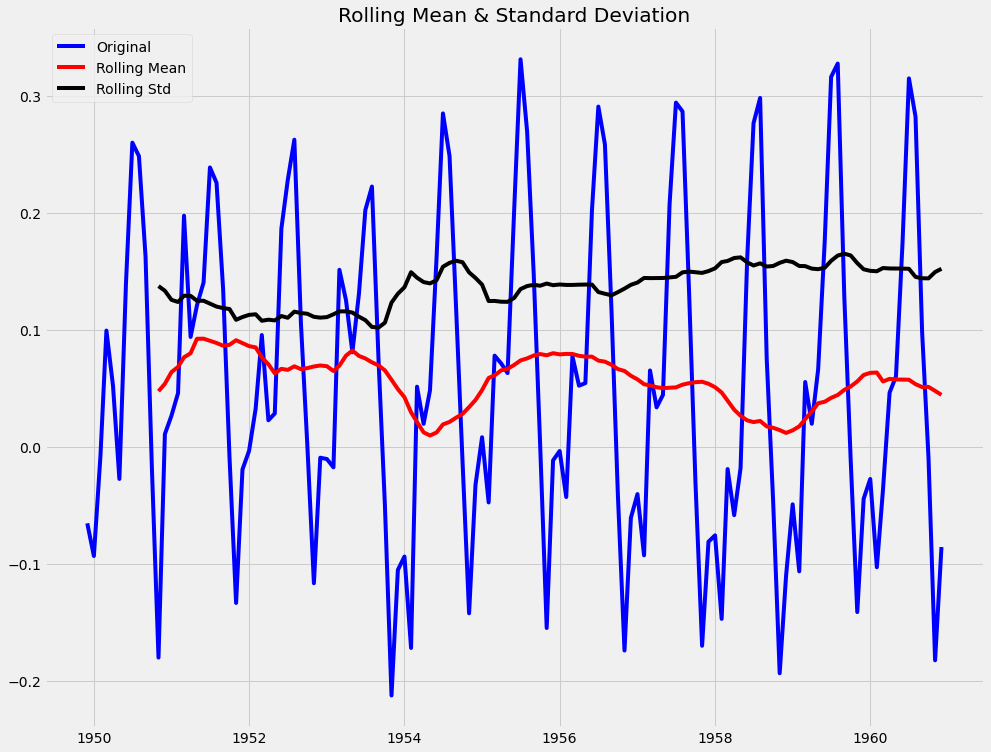

ADF Statistic: -3.162908
p-value: 0.022235
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Reject Ho - Time Series is Stationary


In [26]:
y_moving_avg_diff.dropna(inplace=True)  # on enleve les Nan
check_stationarity(y_moving_avg_diff)

Notre nouvelle série est à présente stationnaire comme nous pouvons le voir ci dessus les courbes noires et rouges sont à peu pès constante au cours du temps 

## <a name="diff"> Différenciation</a> 


Pour nettoyer une série de sa tendance et/où de sa saisonnalité, nous pouvons procéder par différenciation. Celà fonctionne pour des séries à tendance polynomiale.

Notons $\Delta$ l’opérateur de différenciation: $\Delta x_t=x_t-x_{t-1}$.

L’opérateur de différenciation d’ordre $k$ correspondant est: $\Delta^k x_t=\Delta(\Delta^{k-1} x_t)$


- Soit un processus $x_t$ admettant une tendance polynomiale d’ordre $k$: $x_t= \sum_{j=0}^{k} a_j t^j +\varepsilon_t$ alors le processus $\Delta x$ admet une tendance polyomiale d’ordre $k-1$.


- Soit un processus $x_t$ admettant une saisonnalité additive de période $\tau$ , alors le processus $\Delta_{\tau}x_t= x_t - x_{t-\tau}$ est un processus désaisonnalisé.


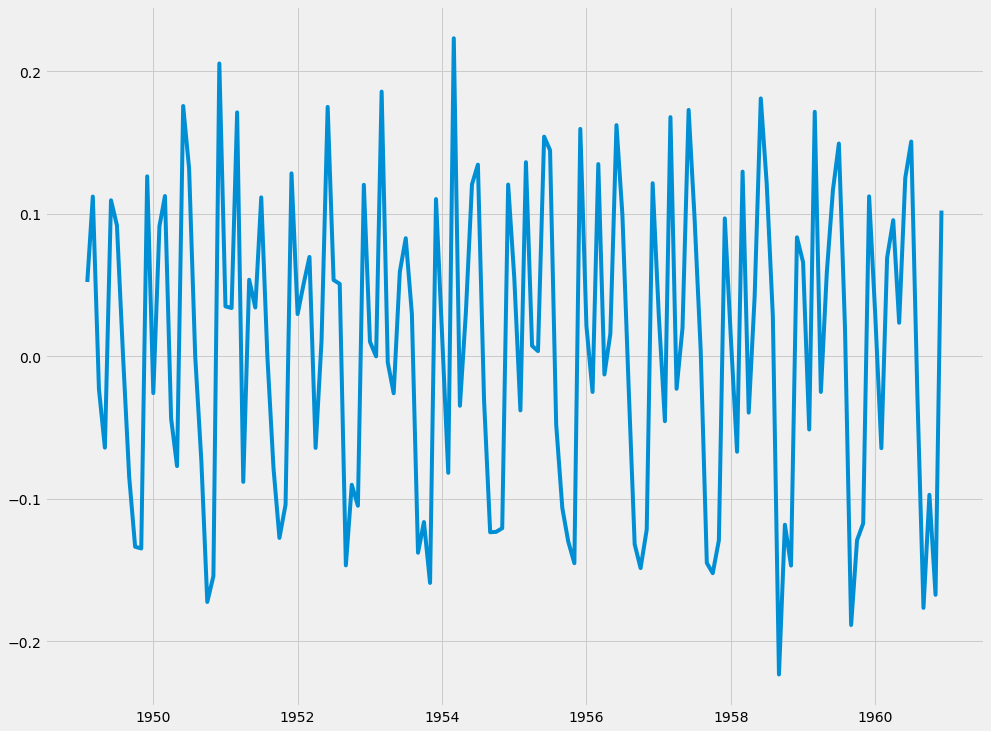

In [27]:
y_diff = y.passagers - y.passagers.shift()
#y_diff = y.passagers.diff()   on peut aussi utiliser cela
y_diff=y_diff.dropna()  # on enleve les NA
plt.plot(y_diff)

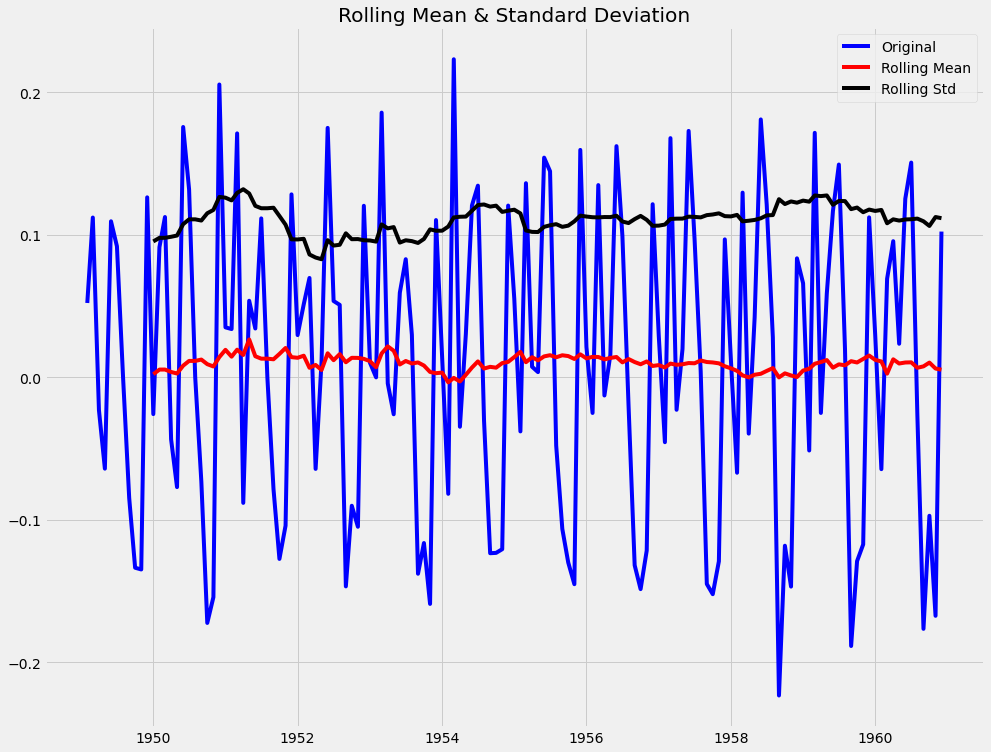

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [28]:
y_diff.dropna(inplace=True)
check_stationarity(y_diff)

Malheureusement la série différencié n'est pas stationnaire d'après le test cependant elle est stationnaire parce que :
- la moyenne et les variations de la ST ont de petites variations dans le temps.
- La statistique du test est inférieure à 10 % des valeurs critiques, de sorte que nous pouvons être sûrs à 90 % qu'elle est stationnaire. 

**Décomposition**

Nous allons decomposer notre série temporelle en tendance saisonnalité et résidus

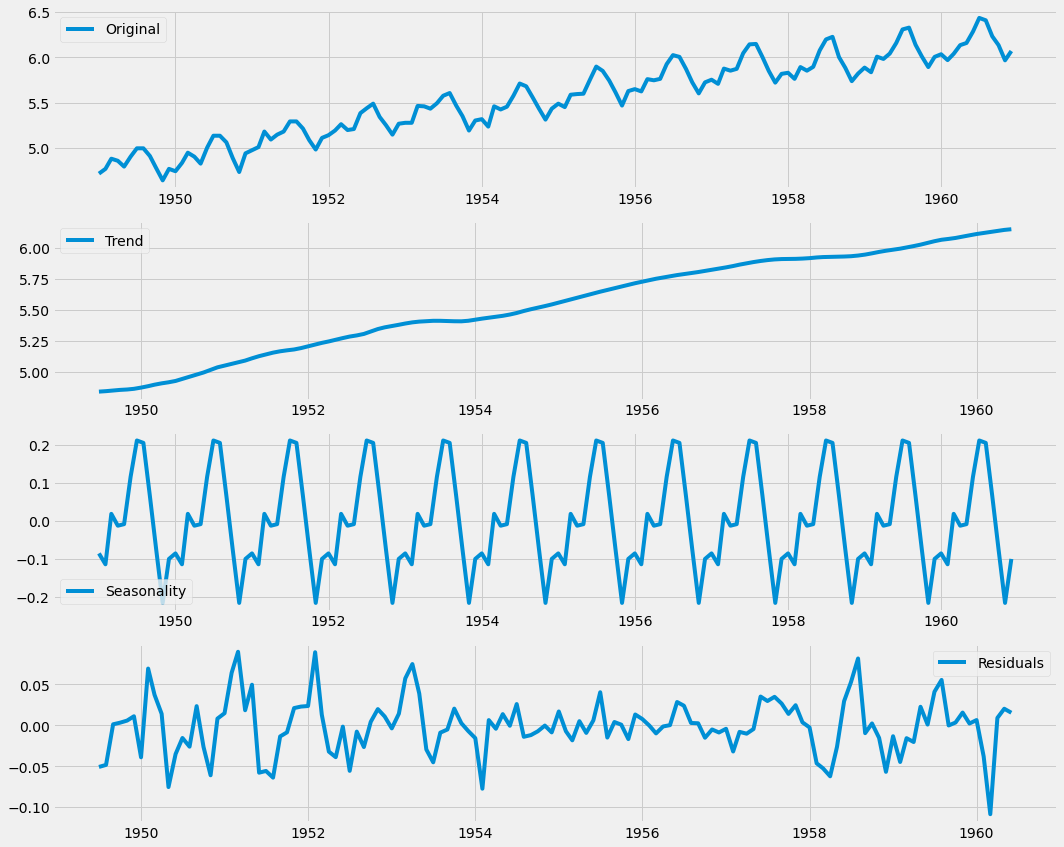

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

On peut regarder la stationnarité des résidus 

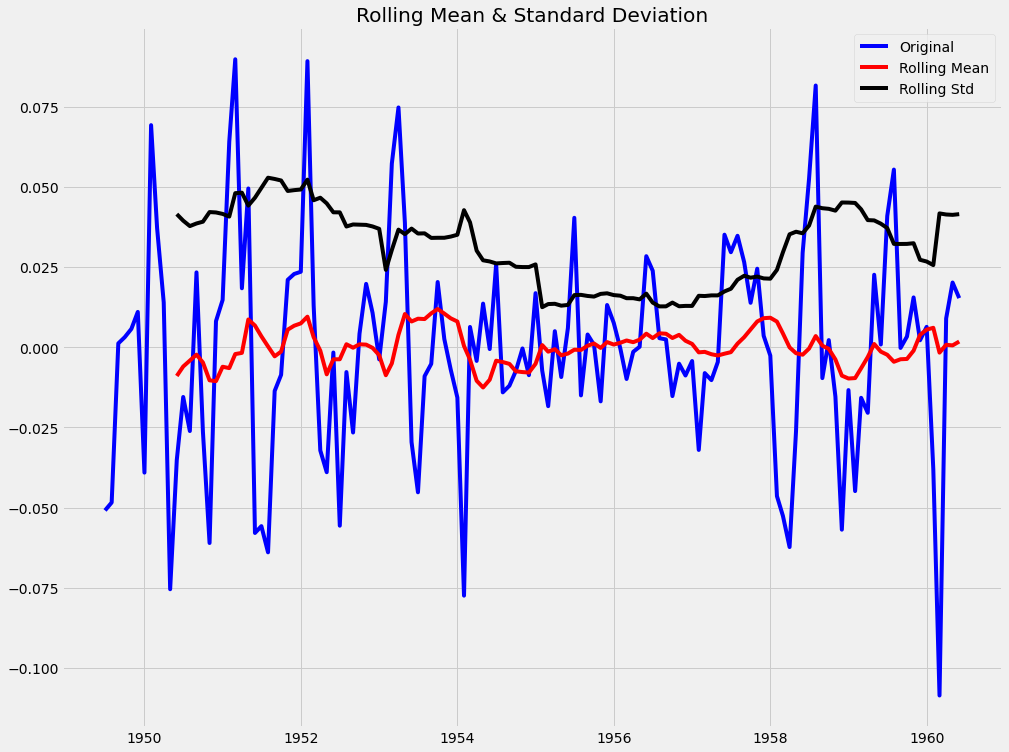

ADF Statistic: -6.332387
p-value: 0.000000
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
Reject Ho - Time Series is Stationary


In [30]:
y_decompose = residual
y_decompose.dropna(inplace=True)
check_stationarity(y_decompose)

## <a name="estpar">Estimation paramétrique</a> 


Après avoir représenté la série, il est souvent possible d’inférer une représentation paramétrique de sa tendance. Dans ce cas, on procède par **régression linéaire** pour estimer cette tendance.

Par exemple, dans le cas d’un processus $x$ admettant une tendance polynomiale d’ordre $k: x_t= \sum_{j=0}^{k} a_j t^j +\varepsilon_t$, un estimateur de la tendance pourra être obtenu ainsi: $\widehat{T}_t= Y \widehat{a}$

ou $Y$ est la matrice dont les colonnes sont les vecteurs $(1,...,t^j)$ et $\widehat{a}= (Y'Y)^{-1}Y'X$ avec $X=(y_1,...,y_t)$.

Un modèle paramétrique naturel pour modéliser un processus saisonnier est la décomposition en série de Fourier. Soit un processus $y_t$ admettant une saisonnalité de période $\tau$ alors le modèle suivant est généralement proposé:

\begin{align}
y_t = \sum_{j=1}^q a_j \cos(\omega_jt) + b_j \sin(\omega_jt) +\varepsilon_t
\end{align}

où $\omega_j=2\pi/\tau$ , q est à déterminer par une méthode de sélection de modèle sur les données. Les coefficients $a_j$ et $b_j$ sont obtenus par moindre carrés sur les données.


Utilisons la régression linéaire pour désaissonnalisez notre série temporelle 

On souhaite désaisonnaliser la série temporelle airpass à l'aide de la régression linéaire.
On créé à cet effet les bases tendancielle et saisonnière bassé sur 12 mois:

In [31]:
t = range(1, 145)  # taille 144

#si compossante saisonniere de taille 144 =12*12 avec decallage et répétitions succésif de [1,0,0,0,0,0,0,0,0,0,0,0]
for i in range(12):
    su = np.repeat(0, repeats=12)
    su[i] = 1
    s = np.tile(su, 144 // len(su) + 1)[:144]
    vars()['s' + str(i+1)] = s                                            

In [32]:
s1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
s2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

On effectue la régression linéaire sur la série Yt :

In [34]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), y)

LinearRegression(fit_intercept=False)

Les différents coefficients de la régression² sont contenues dans reg.coef_ :

In [35]:
print(reg.coef_)

[[0.0100688  4.72678037 4.70472554 4.83495267 4.80368381 4.80131117
  4.92345737 5.0273997  5.01810486 4.87347026 4.73531202 4.59159431
  4.7054593 ]]


On revient aux coefficients initiaux :

In [36]:
a = np.mean(reg.coef_[0][1:13])
b = reg.coef_[0][0]
c = reg.coef_[0][1:13] - a

In [37]:
y_cvs = y['passagers'] - (c[0]*s1+c[1]*s2+c[2]*s3+c[3]*s4+c[4]*s5+c[5]*s6+c[6]*s7+c[7]*s8+c[8]*s9+
                        c[9]*s10+c[10]*s11+c[11]*s12)
x_cvs = np.exp(y_cvs)

<AxesSubplot:xlabel='annee'>

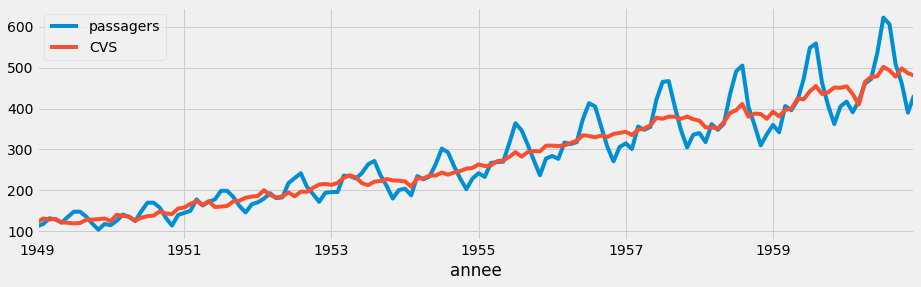

In [38]:
x_cvs = x_cvs.rename("CVS")   #cvs POUR CORRECTION DES VARIABLES SAISONNIERE
x.plot(figsize=(14,4))
x_cvs.plot(legend = True)

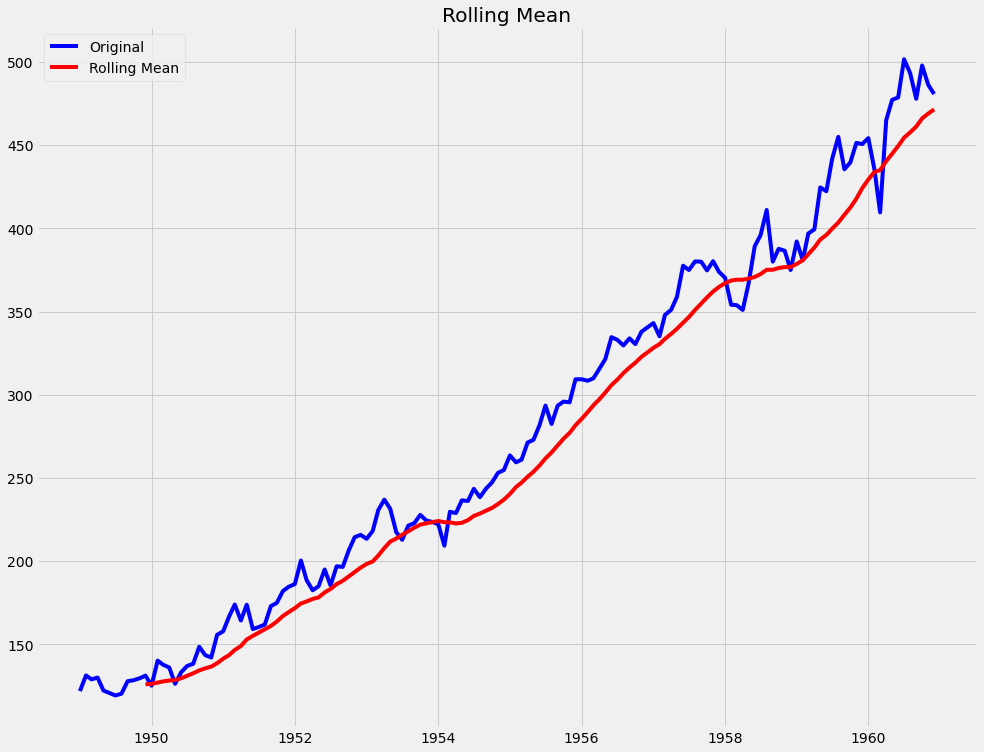

ADF Statistic: 1.142084
p-value: 0.995560
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [39]:
check_stationarity(x_cvs,rstd='f')

## <a name="estnpar">Estimation non-paramétrique</a> 

Dans certains cas, une représentation paramétrique de la tendance n’est pas satisfaisante. Le modèle sous-jacent à ce type de données est: $x_t=f(t)+\varepsilon_t$ où f est une fonction régulière sur laquelle on ne fait pas d’hypothèse paramétrique, $t=1,2,..,n$. On ne fait pour l’instant pas d’hypothèses précises sur $\varepsilon_t$, considérés comme stationnaires. On pourra dans ce cas considérer une estimation non-paramétrique de cette tendance. Plusieurs approches sont possibles.
- Estimateur à noyaux: Soit un réel $h>0$ (paramètre de fenêtre), soit un noyau $K$. On appelle estimateur à noyau de f associé à la fenêtre h et au noyau $K$ la fonction $\widehat{f}_h$ définie par: $\widehat{f}_h(x)= \frac{\sum_{i=1}^n y_i K(\frac{x-i}{h})}{\sum_{i=1}^n  K(\frac{x-i}{h})}$ est une estimation non-paramétrique de la tendance de la série. La régularité de cet estimateur dépend de h la taille de fenêtre du noyau.
- De même que pour la moyenne mobile, il est possible en choisissant la bonne valeur de fenêtre d’estimer la composante saisonnière d’un processus par méthode à noyau et polynômes locaux.
- Exemple de noyaux:
    - Gaussien: $K(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$

    - Uniforme: $K(x) =\ 1_{(|x|\leq 1)}/2$

    - Triangle: $K(x) = (1-|x|)\ 1_{(|x|\leq 1)}$ 

    - Epanechnikov:  $K(x) =\frac{3}{4} (1-x^2)\ 1_{(|x|\leq 1)}$



# <a name="5">V. Prévisions avec les méthodes de lissage</a> 

Les méthodes de lissage exponentiel, basées sur les travaux de Holt et Winters, ne font plus l'objet de recherches. Si elles peuvent apparaître "faibles" théoriquement, elles sont faciles à mettre en œuvre, d'où leur utilisation populaire dans le passé. Leur objectif est de prévoir à la date T une série temporelle à un horizon  $(\ell)$   à partir de T observations  $\left( X_{1},\ldots,X_{T}\right).$ 

## <a name="ls">Le lissage exponentiel simple </a>

Le lissage exponentiel simple (LES) consiste à supposer que  $X_{t}$ est approximable autour de T par une constante $a_{T}$  .
Soit  $\widehat{X}_{t}(\ell)$  la prévision de  $X_{T+\ell}$  à l'instant T.
La prévision par la méthode du LES est la suivante :

${\forall \ell\in\mathbb{N}^{\ast}:\widehat{X}_{T}(\ell)=\widehat{X}_{T}(1)=\widehat{X}_{T+1}=\left( 1-\alpha\right)\sum_{t=0}^{T-1}\alpha^{t}X_{T-t}}$
où $\alpha\in\left] 0,1\right[$  désigne le coefficient de lissage.
On peut remarquer que :

Les réalisations ont d'autant plus de poids qu'elles sont récentes (en effet le poids $\alpha^t$  devant $X_{T-t}$  décroît avec t).

La prévision ne dépend pas de l'horizon  $(\ell)$  , ce qui peut laisser pantois en l'état.

Formule de mise à jour
Il n'est pas obligatoire de recalculer entièrement la prévision à chaque instant.\\
On a en effet :
$\widehat{X}_{T+1}=\left( 1-\alpha\right) X_{T}+\alpha\widehat{X}_{T}$
D'où :

$\widehat{X}_{T+1}=\widehat{X}_{T}+\left( 1-\alpha\right)\left( X_{T}-\widehat{X}_{T}\right)$
On peut ainsi calculer la lissée  $\widehat{X}_{t}$  à n'importe quel instant t en fonction de celle à l'instant t-1.

Choix du coefficient de lissage
On utilise un algorithme d'optimisation afin de minimiser la quantité suivante :

$\sum_{t=1}^{T-1}\left( X_{t+1}-\widehat{X}_{t+1}\right) ^{2}=\sum_{t=1}^{T-1}\left( X_{t+1}-\left( 1-\alpha\right)\sum_{i=0}^{t-1}\alpha^{i}X_{t-i}\right) ^{2}$
Cette quantité est la somme des écarts quadratiques entre les réalisations et les prévisions de la série temporelle.

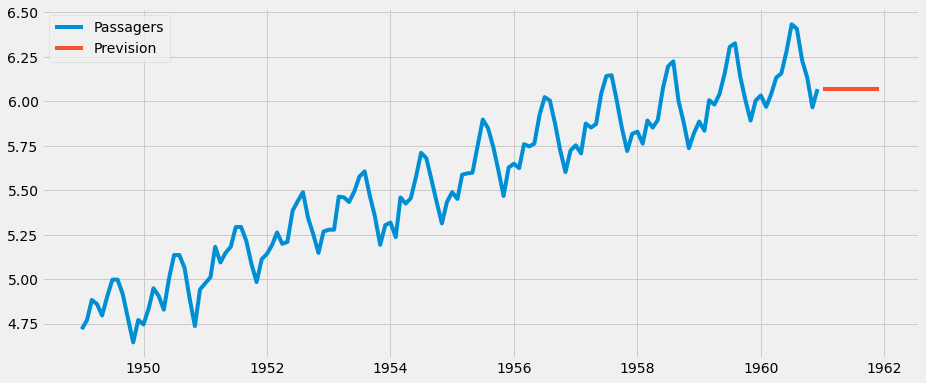

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing

les = ExponentialSmoothing(np.asarray(y), trend=None, seasonal=None).fit()
les_pred = les.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y, label='Passagers')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), les_pred, label='Prevision')
plt.legend()
plt.show()

## <a name="ld">Le lissage exponentiel double </a>

Le lissage exponentiel double (LED) consiste lui à supposer que  $X_{t}$  est approximable au voisinage de  $𝑇$  par une droite :  $a_{T}+\left( t-T\right) b_{T}$  .

Les formules de mise à jour sont :

$\begin{cases} \widehat{a}_{T}=\widehat{a}_{T-1}+\widehat{b}_{T-1}+\left( 1-\alpha^{2}\right)\left( X_{T}-\widehat{X}_{T-1}(1)\right)\\ \widehat{b}_{T}=\widehat{b}_{T-1}+\left( 1-\alpha\right) ^{2}\left( X_{T}-\widehat{X}_{T-1}(1)\right) \end{cases}$

Le paramètre de la méthode du LED est $\alpha\in\left] 0,1\right[$  .

La prévision par la méthode du LED est la suivante :

$\forall \ell\in\mathbb{N}^{\ast}:\widehat{X}_{T}(\ell)=\widehat{a}_{T}+\ell\, \widehat{b}_{T}$


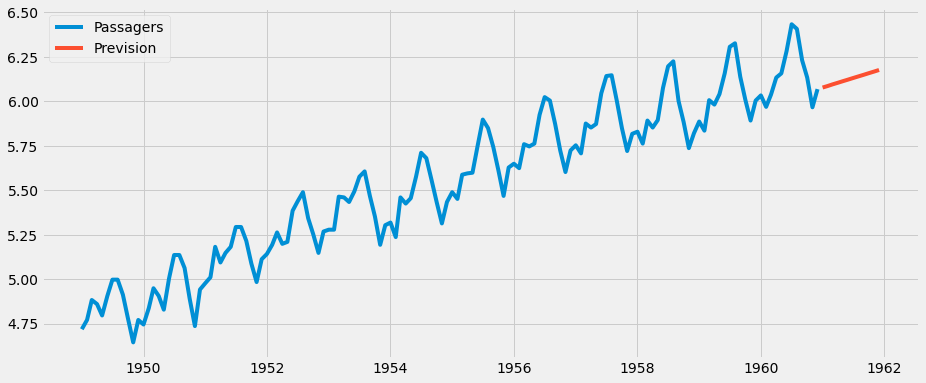

In [41]:
led = ExponentialSmoothing(np.asarray(y), trend='mul', seasonal=None).fit()
led_pred = led.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y, label='Passagers')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), led_pred, label='Prevision')
plt.legend()
plt.show()

## <a name="hw"> La méthode de Holt-Winters </a>

La méthode de Holt-Winters, parfois encore utilisée en pratique, consiste à supposer que  $X_{t}$ est approximable au voisinage de T par aT+(t−T)bT+ST .
En désignant par s la période du cycle saisonnier de la série temporelle, les formules de mise à jour sont :

$\begin{cases} \widehat{a}_{T}=\left( 1-\alpha\right)\left( X_{T}-\widehat{S}_{T-s}\right) +\alpha\left(\widehat{a}_{T-1}+\widehat{b}_{T-1}\right)\\ \widehat{b}_{T}=\left( 1-\beta\right)\left(\widehat{a}_{T}-\widehat{a}_{T-1}\right) +\beta\, \widehat{b}_{T-1}\\ \widehat{S}_{T}=\left( 1-\gamma\right)\left( X_{T}-\widehat{a}_{T}\right) +\gamma\, \widehat{S}_{T-s} \end{cases}$

Les paramètres de la méthode de Holt-Winters sont α , β et γ (tous dans ]0,1[ ).
La prévision par la méthode de Holt-Winters est la suivante :

$\begin{cases} \widehat{X}_{T}(\ell)=\widehat{a}_{T}+\ell\, \widehat{b}_{T}+\widehat{S}_{T+\ell-s}&;\text{si $\ell\in\left\{1,\ldots,s\right\}$}\\ \widehat{X}_{T}(\ell)=\widehat{a}_{T}+\ell\, \widehat{b}_{T}+\widehat{S}_{T+\ell-2s}&;\text{si $\ell\in\left\{s+1,\ldots,2s\right\}$}\\ \ldots \end{cases}$

Quelle que soit la méthode employée, on constate qu'une prévision n'est qu'une fonction du passé de la série . Selon la méthode retenue, cette fonction diffère, mais l'idée est toujours la même !

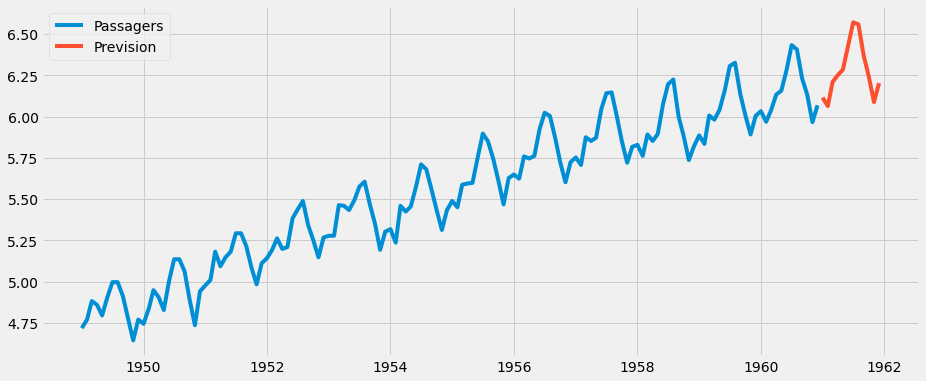

In [42]:
hw = ExponentialSmoothing(np.asarray(y), seasonal_periods=12, trend='mul', seasonal='mul').fit()
hw_pred = hw.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(y, label='Passagers')
plt.plot(pd.date_range(y.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Prevision')
plt.legend()
plt.show()

# <a name="6">VI. Prévisions avec les méthodes stochastiques</a> 


## <a name="ar"> Les processus AR  </a>

Définition
On dit qu'un processus $\left( X_{t}\right)_{t\in\mathbb{Z}}$  (stationnaire) est un processus processus AR (AutoRegressive) d'ordre $(p)$  , noté  $(AR(p))$  , si :
$\forall t\in\mathbb{Z}:X_{t}=\sum_{i=1}^{p}\varphi_{i}X_{t-i}+\varepsilon_{t}$
où  $\left(\varphi_{1},\ldots,\varphi_p\right)\in\mathbb{R}^{p}$ et  $\varphi_p\neq 0$ .\
La modélisation de   $\left( X_{t}\right)_{t\in\mathbb{Z}}$ se résume à une relation linéaire le liant aux  $(p)$  derniers instants.

Caractérisation
Si   $\left( X_{t}\right)_{t\in\mathbb{Z}}$  est un processus $(AR(p))$  alors ses autocorrélations partielles s'annulent à partir du rang  $(p+1)$  :

$\begin{cases} r(p)\neq 0\\ \forall h\in\mathbb{N},h\geq p+1:r(h)=0 \end{cases}\ $ 
Réciproquement, il s'agit d'une condition nécessaire et suffisante pour qu'un processus   $\left(X_{t}\right)_{t\in\mathbb{Z}}$ soit un  $(AR(p))$ .
Les autocorrélations simples, quant à elles, décroissent rapidement vers 0 (de manière exponentielle ou sinusoïdale amortie).

- La méthode d'autorégression (AR) modélise l'étape suivante de la série comme une fonction linéaire des observations aux étapes temporelles précédentes.
- Nombre de termes AR (auto-régression) (p): p est le paramètre associé à l'aspect auto-régressif du modèle, qui incorpore les valeurs passées, c'est-à-dire les retards de la variable dépendante. Par exemple, si p est égal à 5, les prédicteurs de $X_t$ seront $X_{t-1}....X_{t-5}$.

Ignorer les commentaires

In [43]:
import warnings
warnings.filterwarnings("ignore")

Modèle AR avec y_diff qui nous a semblé stationnaire malgré le test

In [44]:
from statsmodels.tsa.ar_model import AR
from random import random

In [45]:
# entrainement du modèle 
ar_model = AR(y_diff)
ar_model_fit = ar_model.fit()

on trace y différencié et notre modèle précédent

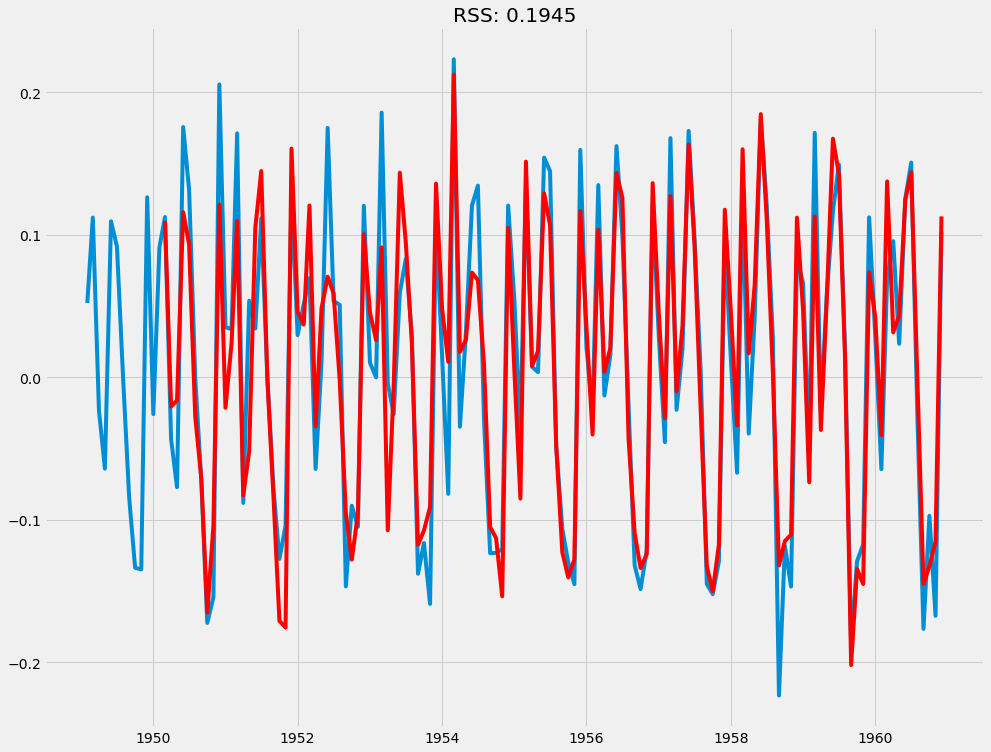

In [46]:
plt.plot(y_diff)
plt.plot(ar_model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((ar_model_fit.fittedvalues-y_diff)**2))
plt.show()

Inversons les transformations

__Valeurs ajustées ou prédites:__

In [47]:
predictions_AR_diff = pd.Series(ar_model_fit.fittedvalues, copy=True)
print (predictions_AR_diff.head())

annee
1950-03-01    0.109713
1950-04-01   -0.020423
1950-05-01   -0.016243
1950-06-01    0.115842
1950-07-01    0.093564
dtype: float64


__Somme cumulée pour inverser les différences:__

In [48]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())

annee
1950-03-01    0.109713
1950-04-01    0.089291
1950-05-01    0.073048
1950-06-01    0.188891
1950-07-01    0.282455
dtype: float64


__Ajout de la valeur du 1er mois qui a été précédemment supprimée par différencation__

In [49]:
predictions_AR_log = pd.Series(y.passagers.iloc[0], index=y.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR_log.head()

annee
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

__On prend l'exponentielle pour inverser la transformation logarithmique de y__

In [50]:
predictions_AR = np.exp(predictions_AR_log)

In [51]:
predictions_AR

annee
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.000000
1949-04-01    112.000000
1949-05-01    112.000000
                 ...    
1960-08-01    507.870483
1960-09-01    439.381381
1960-10-01    384.862166
1960-11-01    343.000589
1960-12-01    384.000000
Length: 144, dtype: float64

<AxesSubplot:xlabel='annee'>

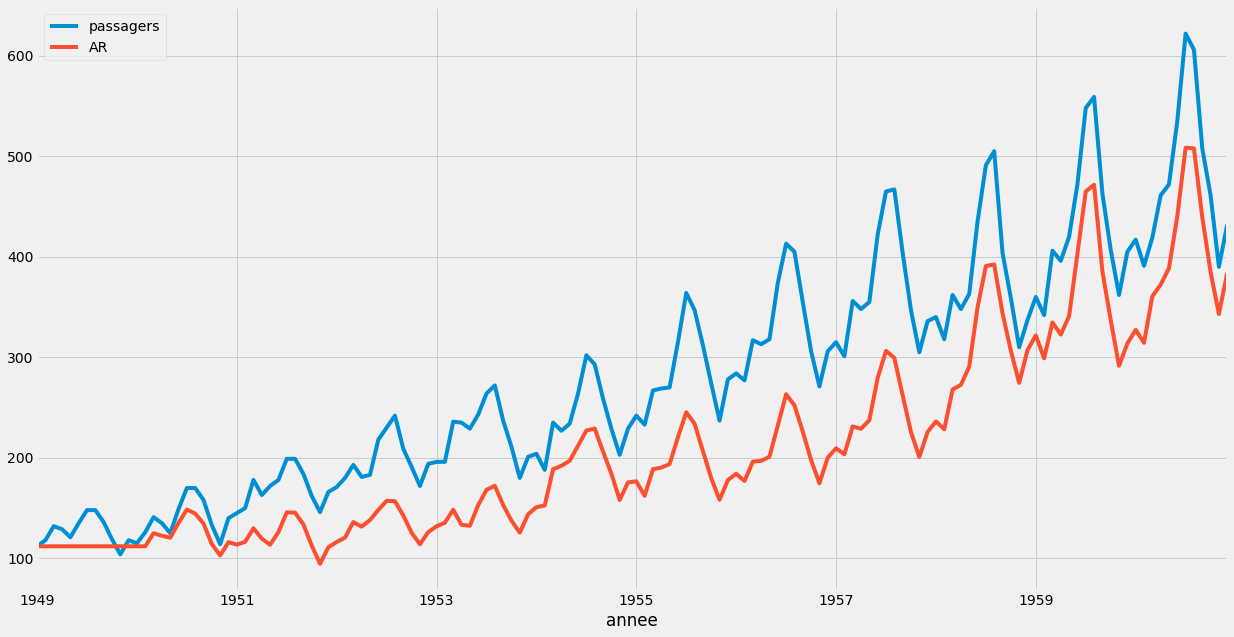

In [52]:
x.plot(figsize=(19,10))
predictions_AR=predictions_AR.rename("AR")
predictions_AR.plot(legend = True)


### <a name="mqp"> Mesure de la qualité des prévisions</a>

- __R squared__
- __Mean Absolute Error__
- __Median Absolute Error__
- __Mean Squared Error__
- __Mean Squared Logarithmic Error__
- __Mean Absolute Percentage Error__

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

__R squared__, coefficient de détermination (il peut être interprété comme un pourcentage de la variance expliquée par le modèle), (-inf, 1], **on souhaite qu'il soit le plus proche de 1.**
- sklearn.metrics.r2_score

$R^2(y, \hat{y}) = 1 - \frac{\sum_0^{n-1} (y_i - \hat{y}_i)^2}{\sum_0^{n-1}(y_i - \bar{y})^2}$

In [54]:
r2_score(x.passagers, predictions_AR)

0.5686734896130742

**Pour toute les mesures suivantes un score plus proche de zéro sera meilleur.**

__Mean Absolute Error__, c'est une mesure interprétable car elle a la même unité de mesure que la série initiale, [0, +inf].
- sklearn.metrics.mean_absolute_error

$\text{MAE}(y, \hat{y}) = \frac{1}{n}\sum_0^{n-1} | y_i - \hat{y}_i |$

In [55]:
mean_absolute_error(x.passagers, predictions_AR)

69.42862838872749

__Median Absolute Error__, à nouveau une mesure interprétable, particulièrement intéressante parce qu'elle est robuste aux valeurs aberrantes, [0, +inf].
- sklearn.metrics.median_absolute_error

$\text{Mean Absolute Error} = \text{median}(|y_0 - \hat{y}_0, \ldots, |y_n - \hat{y}_n|)$

In [56]:
median_absolute_error(x.passagers, predictions_AR)

69.36695435384787

<a name="mse"></a>
__Mean Squared Error__, le plus couramment utilisé, donne une pénalité plus élevée aux grosses erreurs et vice versa, [0, +inf].
- sklearn.metrics.mean_squared_error


$\text{MSE} = \frac{1}{n} \cdot \sum_0^{n - 1} (y_i - \hat{y}_i)^2$

In [57]:
mean_squared_error(x.passagers, predictions_AR)

6164.506983577632

__Mean Squared Logarithmic Error__, pratiquement le même que celui du MSE, mais nous prenons d'abord le logarithme de la série, par conséquent nous prêtons attention aux petites erreurs également, est généralement utilisé lorsque les données ont des tendances exponentielles, [0, +inf].
- sklearn.metrics.mean_squared_log_error

$MSLE = \frac{1}{N} \sum_{i=1}^{N} \big(ln \big(\frac{y_i +1} {\hat{y}_i +1}\big)\big)^2 $

In [58]:
mean_squared_log_error(x.passagers, predictions_AR)

0.09945599448249753

__Mean Absolute Percentage Error__, même que le MAE mais en pourcentage, - très pratique lorsque vous voulez expliquer la qualité du modèle à votre direction, [0, +inf].
- non mis en œuvre dans sklearn

$MAPE=\frac{100}{n} \sum_i^n \frac{y_i - \hat{y}_i}{y_i}$

In [59]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [60]:
mean_absolute_percentage_error(x.passagers, predictions_AR)

24.47240542986235

__Function to evaluate forecast using above metrics:__

In [61]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [62]:
evaluate_forecast(x.passagers, predictions_AR)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.568673,69.428628,69.366954,6164.506984,0.099456,24.472405,78.514374


- La RMSE a l'avantage de pénaliser davantage les erreurs importantes et peut donc être plus appropriée dans certains cas, par exemple si le fait d'être en retard de 10 est plus de deux fois plus mauvais que celui de 5, mais si le fait d'être en retard de 10 est juste deux fois plus mauvais que celui de 5, alors la MAE est plus appropriée.

- Du point de vue de l'interprétation, le MAE est clairement le gagnant. RMSE ne décrit pas seulement l'erreur moyenne et a d'autres implications plus difficiles à démêler et à comprendre.

- D'autre part, un avantage distinct de la RMSE par rapport à la MAE est que la RMSE évite de prendre la valeur absolue, ce qui n'est pas souhaitable dans de nombreux calculs mathématiques



## <a name="ma"> Les processus MA </a>

Définition
On dit qu'un processus  $\left( X_{t}\right)_{t\in\mathbb{Z}}$  est un processus $MA$ (Moving Average) d'ordre  $(q)$  , noté  $MA(q)$  , si :

$\forall t\in\mathbb{Z}:X_{t}=\varepsilon_{t}+\sum_{i=1}^{q}\theta_{i}\varepsilon_{t-i}$
où  $\left(\theta_{1},\ldots,\theta_{q}\right)\in\mathbb{R}^{q}$  et  $\theta_{q}\neq 0$  .
On considère ici que le processus est la résultante d'une combinaison linéaire de perturbations decorrélées (un bruit blanc et son passé).

Caractérisation
Si   $\left( X_{t}\right)_{t\in\mathbb{Z}}$  est un processus  \(MA(q)\)  alors ses autocorrélations simples s'annulent à partir du rang  $(q+1)$  :

$\begin{cases} \rho(q)\neq 0\\ \forall h\in\mathbb{N},h\geq q+1:\rho(h)=0 \end{cases} \ .$ 
Il s'agit d'une condition nécessaire et suffisante pour qu'un processus   $\left( X_{t}\right)_{t\in\mathbb{Z}}$  soit un  $MA(q)$ .

- __Nombre de termes MA (moyenne mobile) (q):__ q est la taille de la fenêtre de la partie moyenne mobile du modèle, c'est-à-dire les erreurs de prévision décalées dans l'équation de prévision. Par exemple, si q est égal à 5, les prédicteurs pour $X_t$ seront $e_{t-1}....e_{t-5}$ où $e_i$ est la différence entre la moyenne mobile au ième instant et la valeur réelle. 

In [63]:
warnings.filterwarnings("ignore")

In [64]:
# MA exemple toujours avec y_diff
from statsmodels.tsa.arima_model import ARMA
from random import random

ma_model = ARMA(y_diff, order=(0, 1))  #MA(Q)= ARMA(0,Q)
ma_model_fit = ma_model.fit(disp=False)

In [65]:
ma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              passagers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sat, 13 Feb 2021   AIC                           -237.507
Time:                        20:33:08   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.passagers     0.2722      0.095      2.873      0.004       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

Residual sum of squares : $\operatorname{RSS} = \sum_{i=1}^n (y_i - f(x_i))^2 $

Text(0.5, 1.0, 'RSS: 1.5245')

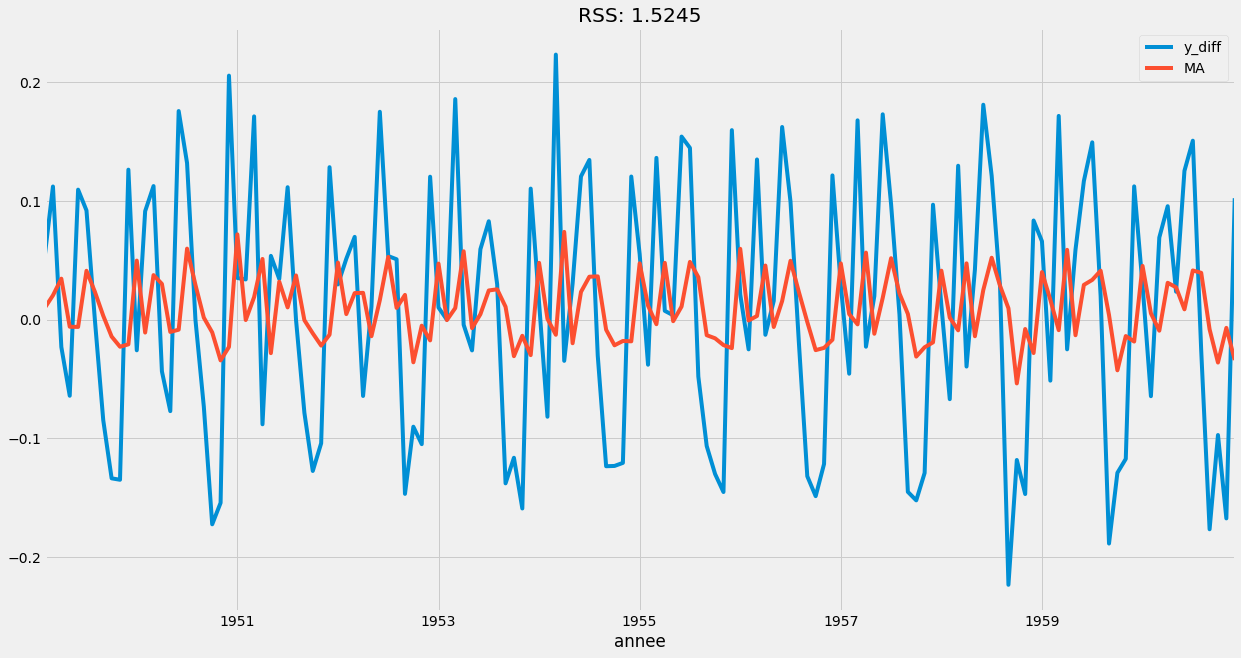

In [66]:
y_diff=y_diff.rename("y_diff")
y_diff.plot(figsize=(19,10),legend = True)
ma_model_fit.fittedvalues=ma_model_fit.fittedvalues.rename("MA")
ma_model_fit.fittedvalues.plot(legend = True)
plt.title('RSS: %.4f'% np.nansum((ma_model_fit.fittedvalues-y_diff)**2))

## <a name="arma"> Les processus ARMA </a>

Définition
Soit $\left(\varepsilon_{t}\right)_{t\in\mathbb{Z}}$  un bruit blanc faible de variance  $\sigma^{2}$ .

On dit qu'un processus   $\left( X_{t}\right)_{t\in\mathbb{Z}}$   est un processus ARMA (AutoRegressive Moving Average) d'ordre  $(p,q)$  , noté  $ARMA(p,q)$  , si :

 $\left( X_{t}\right)_{t\in\mathbb{Z}}$  est stationnaire,

$\forall t\in\mathbb{Z}:X_{t}=\sum_{i=1}^{p}\varphi_{i}X_{t-i}+\varepsilon_{t}+\sum_{i=1}^{q}\theta_{i}\varepsilon_{t-i}$  où  $\left(\varphi_{1},\ldots,\varphi_p\right)\in\mathbb{R}^{p}$  ,  $\varphi_p\neq 0$  ,  $\left(\theta_{1},\ldots,\theta_{q}\right)\in\mathbb{R}^{q}$  et  $\theta_{q}\neq 0$  .

Il s'agit ici d'une "synthèse" des processus $AR$ et $MA$.
- Un modèle autorégressif AR(p) est un ARMA(p,0)

- Un modèle moyenne mobile MA(q) est un ARMA(0,q)

Caractérisation
Les autocorrélations simples décroissent vers 0. Il n'existe pas malheureusement de caractérisation simple, on verra comment procéder en pratique plus tard.

A l'issue d'une modélisation ARMA, il faudra tester la blancheur du résidu à partir de l'autocorrélogramme simple.


- __Nombre de termes AR (Auto-Régressif) (p):__ p est le paramètre associé à l'aspect auto-régressif du modèle, qui incorpore les valeurs passées, c'est-à-dire les retards de la variable dépendante. Par exemple, si p est égal à 5, les prédicteurs de $X_t$ seront $X_{t-1}....X_{t-5}$.
- **Nombre de termes MA (moyenne mobile) (q)**: q est la taille de la fenêtre de la partie moyenne mobile du modèle, c'est-à-dire les erreurs de prévision décalées dans l'équation de prévision. Par exemple, si q est égal à 5, les prédicteurs pour $X_t$ seront $e_{t-1}....e_{t-5}$ où $e_i$ est la différence entre la moyenne mobile au ième instant et la valeur réelle. 

In [67]:
# ARMA exemple
from statsmodels.tsa.arima_model import ARMA
from random import random

arma_model = ARMA(y_diff, order=(2, 1))
arma_model_fit = arma_model.fit(disp=False)

In [68]:
arma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 y_diff   No. Observations:                  143
Model:                     ARMA(2, 1)   Log Likelihood                 140.076
Method:                       css-mle   S.D. of innovations              0.090
Date:                Sat, 13 Feb 2021   AIC                           -270.151
Time:                        20:33:09   BIC                           -255.337
Sample:                    02-01-1949   HQIC                          -264.131
                         - 12-01-1960                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0101      0.000     23.509      0.000       0.009       0.011
ar.L1.y_diff     0.9982      0.076     13.162      0.000       0.850       1.147
ar.L2.y_diff    -0.4134      0.077     -5.384      0.000      -0.564      -0.263
ma.L1.y_diff    -1.0000      0.028    -35.273      0.000      -1.056      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2073           -0.9805j            1.5553           -0.1086
AR.2            1.2073           +0.9805j            1.5553            0.1086
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1.1753')

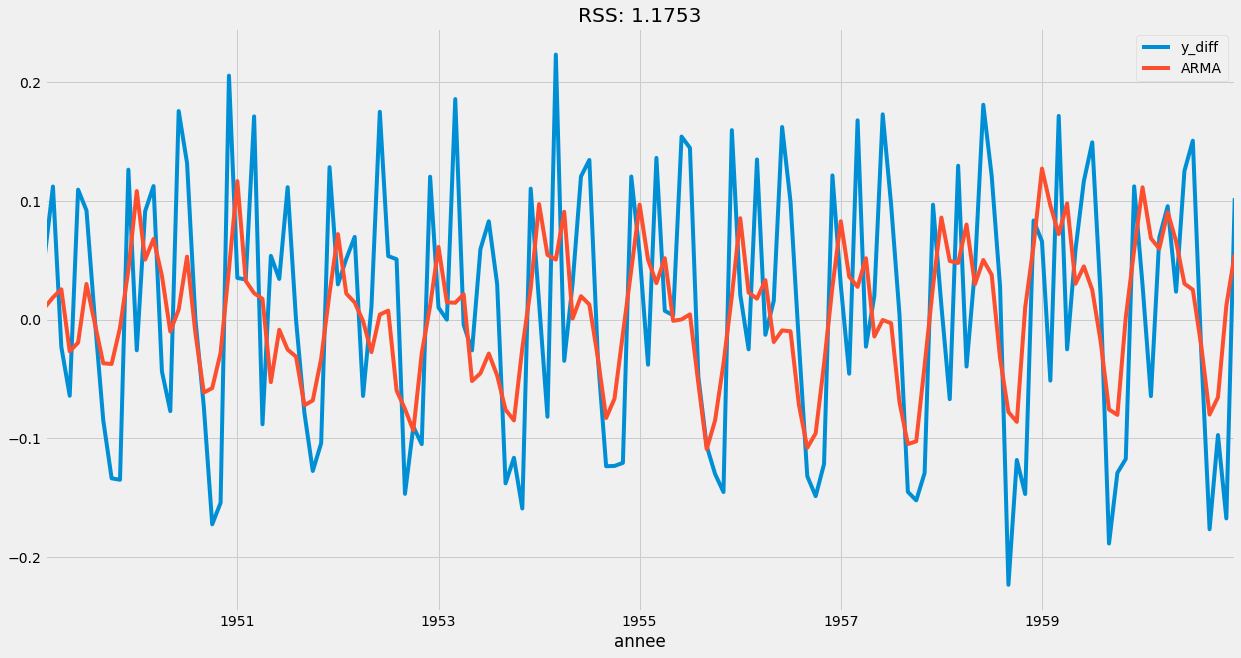

In [69]:
y_diff.plot(figsize=(19,10),legend = True)
arma_model_fit.fittedvalues=arma_model_fit.fittedvalues.rename("ARMA")
arma_model_fit.fittedvalues.plot(legend = True)
plt.title('RSS: %.4f'% np.nansum((arma_model_fit.fittedvalues-y_diff)**2))

Revenons sur le choix de l’ordre d’un ARMA(p,q). Nous avons vu précédemment que l’étude des autocorrélations et autocorrélations partielles peuvent permettre de préselectionner un certains nombre de modèles plausibles. On peut ensuite, une fois les paramètres de ces modèles estimés sélectionner celui qui minimise les critères suivants:

AIC Akaike Information Criterion, adapté au problème de la prévision, défini par:
$\text{AIC}(\phi,\theta,\sigma^2)= -2\log(L(\theta,\phi,\sigma^2)) +2k$

où L est la vraisemblance, k est le ombre de paramètres dans le modèle donc p+q ou p+q+1 si la constante est dans le modèle.

BIC Bayesian Information Criterion, adapté au problème de la prévision, défini par:
$\text{BIC}(\phi,\theta,\sigma^2)= -2\log(L(\theta,\phi,\sigma^2)) +nk$

**Nous verrons celà avec Arima et Sarima.**

## <a name="arima"> Les processus ARIMA </a>

On dit qu'un processus   $\left( X_{t}\right)_{t\in\mathbb{Z}}$   est un processus ARIMA (AutoRegressive Integrated Moving Average) d'ordre $\left( p,d,q\right)$  , noté  $\operatorname{ARIMA}\left( p,d,q\right)$  , si :

$\Phi\left( B\right)\nabla^{d}X_{t}=\Theta\left( B\right)\varepsilon_{t}$
où :

$\nabla^{d}=\left( I-B\right) ^{d}$ ,

$\Phi\left( B\right)=I-\varphi_{1}B-\ldots-\varphi_pB^{p}$  où $\left(\varphi_{1},\ldots,\varphi_p\right)\in\mathbb{R}^{p}$  et  $\varphi_p\neq 0$,

$\Theta\left( B\right)=I+\theta_{1}B+\ldots+\theta_{q}B^{q}$  où et  $\theta_{q}\neq 0$  .

Notons que :

Les modèles ARIMA permettent de modéliser des séries temporelles qui présentent une tendance polynomiale.

$\left( I-B\right) ^{d}X_{t}$ est équivalent asymptotiquement à un processus  $\operatorname{ARMA}(p,q)$ .

Le processus  $\left( X_{t}\right)_{t\in\mathbb{N}}$  n'est pas stationnaire.

Dans un modèle ARIMA, trois paramètres sont utilisés pour aider à modéliser les principaux aspects d'une série chronologique : la saisonnalité, la tendance et le bruit. Ces paramètres sont appelés p, d et q.

-  __Nombre de termes AR (Auto-Régressif) (p):__ p est le paramètre associé à l'aspect auto-régressif du modèle, qui incorpore les valeurs passées, c'est-à-dire les retards de la variable dépendante. Par exemple, si p est égal à 5, les prédicteurs de $X_t$ seront $X_{t-1}....X_{t-5}$.
-  __Nombre de différences (d):__ d est le paramètre associé à la partie intégrée du modèle, qui influe sur l'importance des différences à appliquer à une série chronologique.
- __Nombre de termes MA (moyenne mobile) (q):__ q est la taille de la fenêtre de la partie moyenne mobile du modèle, c'est-à-dire les erreurs de prévision décalées dans l'équation de prévision. Par exemple, si q est égal à 5, es prédicteurs pour $X_t$ seront $e_{t-1}....e_{t-5}$ où $e_i$ est la différence entre la moyenne mobile au ième instant et la valeur réelle. 

**On reprend l'acf et le pacf avec notre série temporelle initiale x différentié**  

In [70]:
x_diff = x.passagers - x.passagers.shift()
x_diff.dropna(inplace=True)

__ACF et PACF tracés après différenciation:__
- Les intervalles de confiance sont dessinés sous forme de cône. 
- Par défaut, il est fixé à un intervalle de confiance de 95%, ce qui suggère que les valeurs de corrélation en dehors de ce code sont très probablement une corrélation et non un hasard statistique.
- Processus AR(1) -- a une queue ACF et une coupure PACF à lag=1
- Processus AR(2) -- a une queue ACF et une coupure PACF à lag=2
- Processus MA(1) -- a l'ACF coupé à lag=1
- Processus MA(2) -- a l'ACF coupé à lag=2

Rappel

### Interpréter les courbes ACF


Forme de l'ACF | Modèle indiqué |
-- | -- |
Exponentiel, décroissant jusqu'à zéro | Modèle autorégressif. Utilisez le tracé d'autocorrélation partielle pour identifier l'ordre du modèle autorégressif |
Alternance de positif et de négatif, décroissant jusqu'à zéro Modèle autorégressif. | Utiliser le tracé d'autocorrélation partielle pour aider à identifier l'ordre. |
Un ou plusieurs pics, le reste est essentiellement nul | Modèle de moyenne mobile, ordre identifié par l'endroit où la parcelle devient nulle. |
Décroissance, débutant après quelques décalages | Modèle mixte autorégressif et à moyenne mobile (ARMA). | 
Tous les zéros ou presque zéros | Les données sont essentiellement aléatoires. |
Valeurs élevées à intervalles fixes | Inclut le terme auto-régressif saisonnier. |
Pas de décroissance à zéro | La série n'est pas stationnaire |

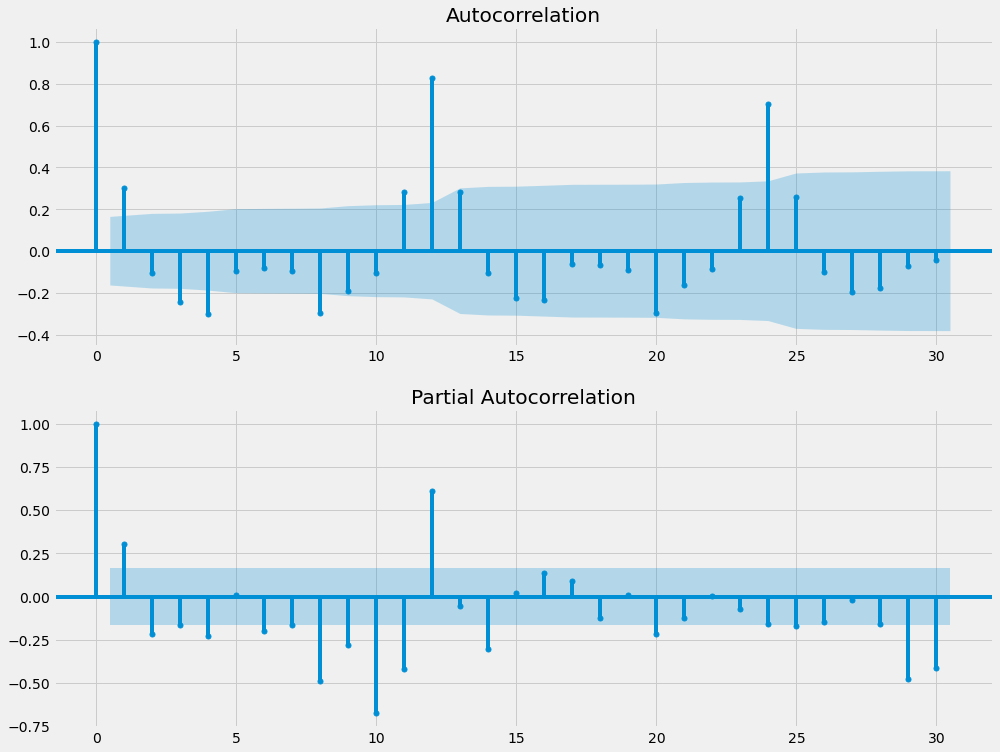

In [71]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(x_diff, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(x_diff, ax=pyplot.gca(),lags=30)
pyplot.show()

**Arima sur la série logarithmique**

Text(0.5, 1.0, 'RSS: 1.0292')

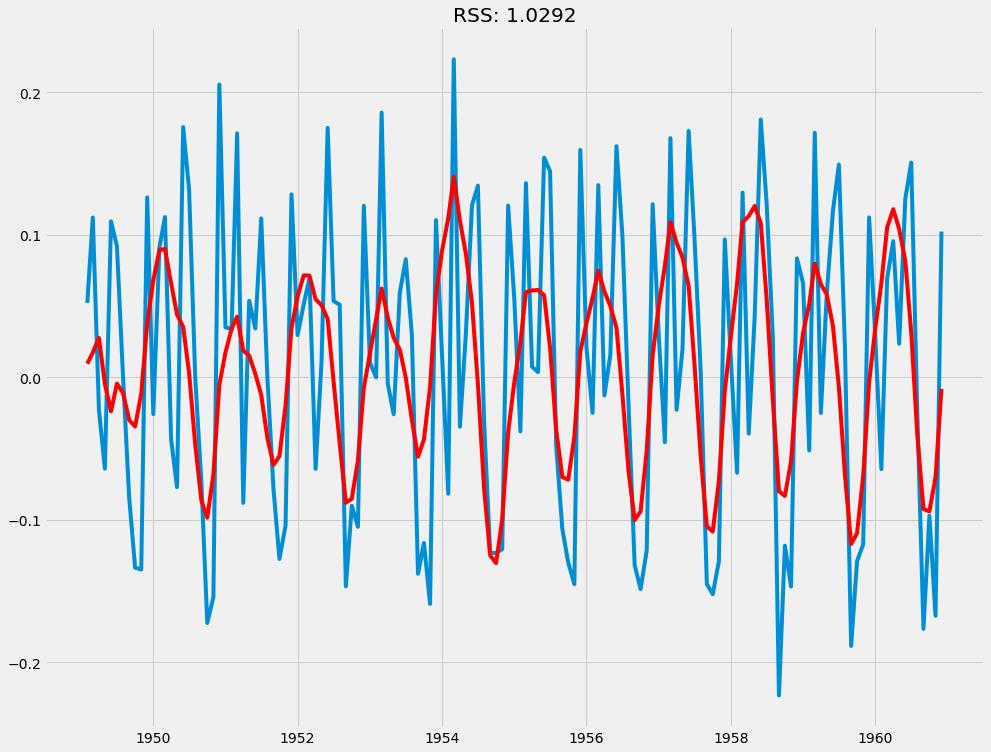

In [72]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA Model
arima_model = ARIMA(y, order=(2, 1, 2))
arima_model_fit = arima_model.fit(disp=-1)
plt.plot(y_diff)
plt.plot(arima_model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((arima_model_fit.fittedvalues-y_diff)**2))

Maintenant, notre ensemble de données y compte 144 lignes, ce qui signifie des valeurs sur 12 ans. Si nous voulons tracer le graphique pour l'année prochaine (1961... etc), nous devons appeler la fonction plot_predict() du modèle ARIMA avec les paramètres 1 (départ de la première ligne) et 204 (144 premières + nouvelles 5x12=60 lignes).

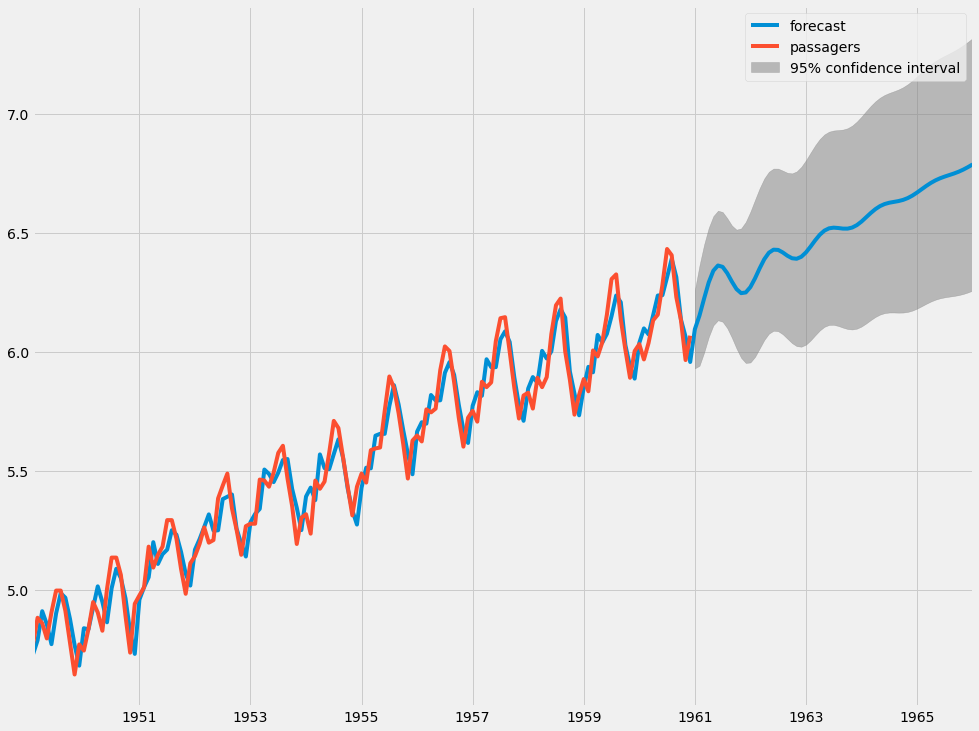

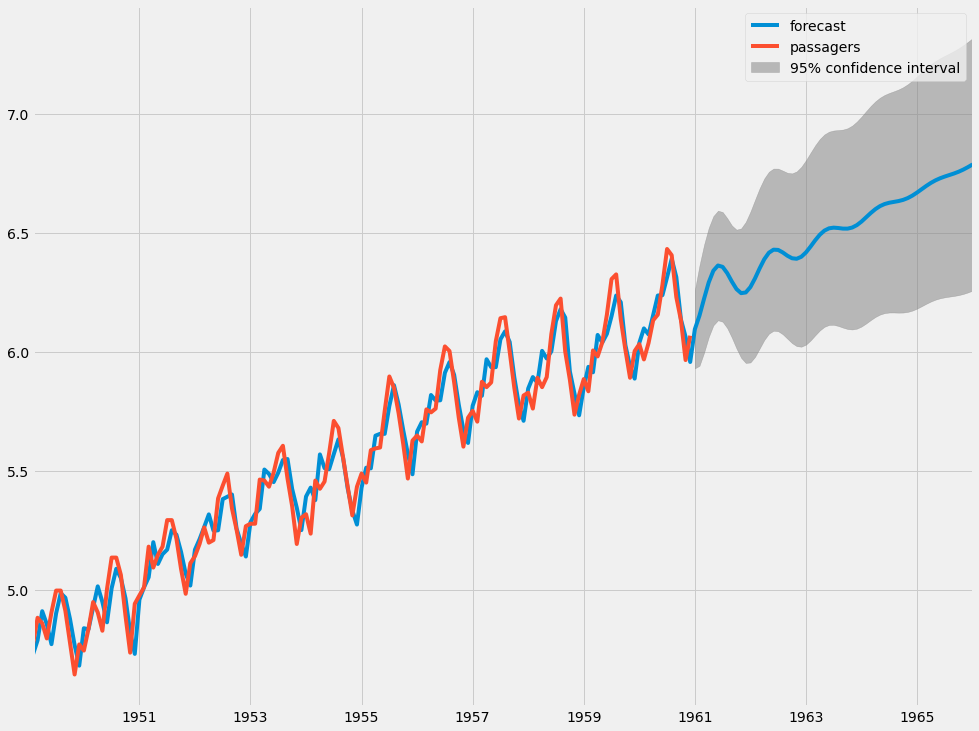

In [73]:
arima_model_fit.plot_predict(1,204)

### <a name="autoarima">Auto ARIMA</a>

**Auto arima sur x**

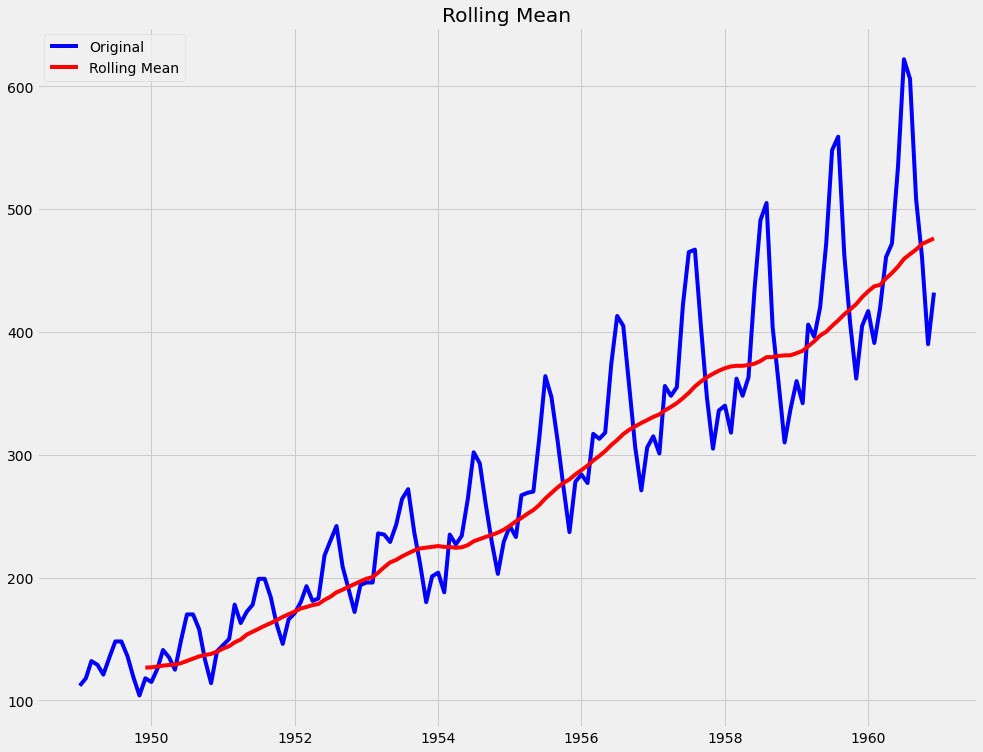

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [74]:
check_stationarity(x,rstd='f')

**Cette série temporelle x (Airpassenger) n'étant pas stationnaire comme ont le savait déja nous pouvons utiliser ARIMA.**

On divise nos donnée en ensemble de jeu de train 75% et de test 25% on entrainera le modèle seulement avec le train

<AxesSubplot:xlabel='annee'>

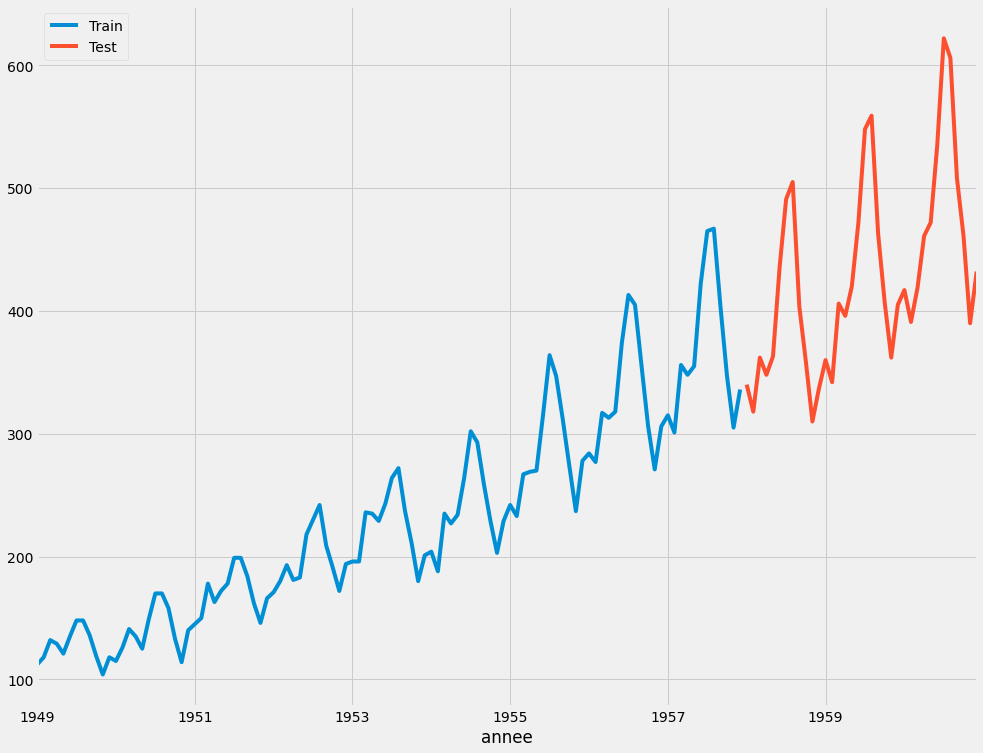

In [75]:
#divisé en train et validation set (ensemble)
train = x[:int(0.75*(len(x)))]
test= x[int(0.75*(len(x))):]
train1=train['passagers']
test1=test['passagers']

train1=train1.rename("Train")
train1.plot(legend=True)
test1=test1.rename("Test")
test1.plot(legend=True)

Auto Arima avec le plus faible AIC

In [76]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=959.218, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1002.826, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=996.373, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=991.646, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1001.531, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=988.670, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=983.832, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.846 seco

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

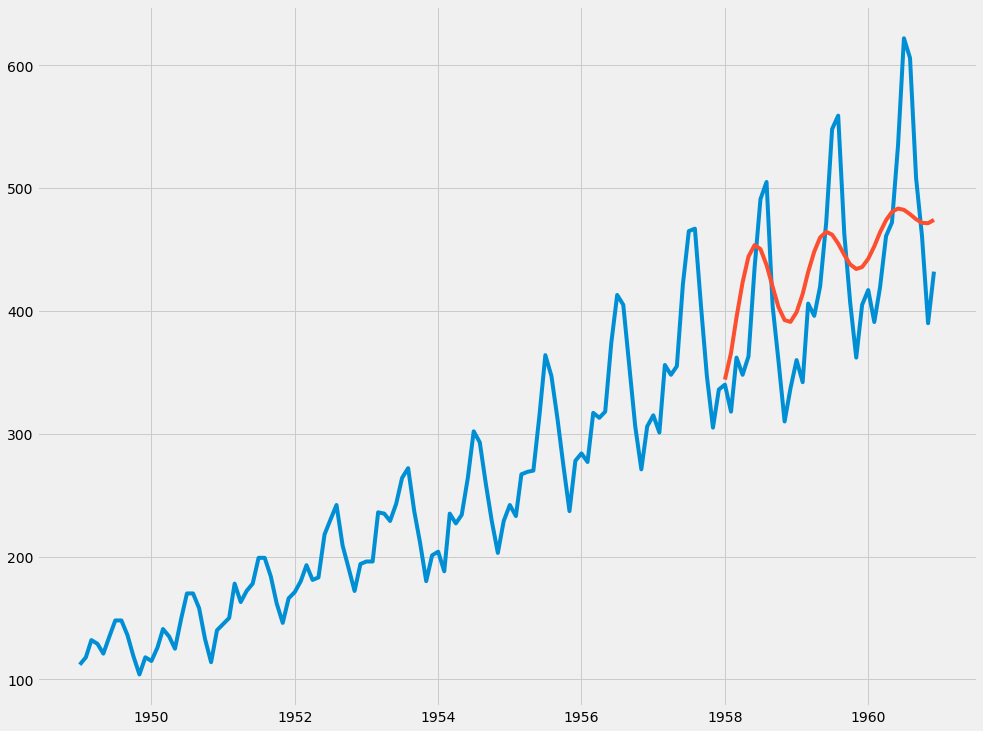

In [77]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for test set
plt.plot(x.passagers, label='Train')
#plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [78]:
evaluate_forecast(test, forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.427068,49.488316,43.100293,3505.372903,0.017613,NaN,59.20619


## <a name="sarima"> Les processus SARIMA </a>

On dit qu'un processus  $\left( X_{t}\right)_{t\in\mathbb{N}}$  est un processus SARIMA (Seasonnal AutoRegressive Integrated Moving Average) d'ordre  $\left( p,d,q\right)\left( P,D,Q\right)_{s}$  , noté  $\operatorname{SARIMA}\left( p,d,q\right)\left( P,D,Q\right)_{s}$  si :

$\Phi\left( B\right)\Phi^{\prime}\left( B^{s}\right)\nabla^{d}\nabla_{s}^{D}X_{t}=\Theta\left( B\right)\Theta^{\prime}\left( B^{s}\right)\varepsilon_{t}$
où :

$\nabla^{d}=\left( I-B\right)^{d}$ ,

$\nabla_{s}^{D}=\left( I-B^{s}\right)^{D}$  ,

$\Phi\left( B\right)=I-\varphi_{1}B-\ldots -\varphi_{p}B^{p}$ où $\left(\varphi_{1},\ldots,\varphi_{p}\right)\in\mathbb{R}^{p}$  et  $\varphi_{p}\neq 0$  ,

$\Phi^{\prime}\left( B\right)=I-\varphi_{1}^{\prime}B-\ldots -\varphi_{P}^{\prime}B^{P}$  où  $\left(\varphi_{1}^{\prime},\ldots,\varphi_{^{\prime}P}\right)\in\mathbb{R}^{P}$  et  $\varphi_{P}^{\prime}\neq 0$  ,

$\Theta\left( B\right)=I+\theta_{1}B+\ldots +\theta_{q}B^{q}$  où $\left(\theta_{1},\ldots,\theta_{q}\right)\in\mathbb{R}^{q}$  et $\theta_{q}\neq 0$  ,

$\Theta^{\prime}\left( B\right)=I+\theta_{1}^{\prime}B+\ldots +\theta_{Q}^{\prime}B^{Q}$ où $\left(\theta_{1}^{\prime},\ldots,\theta_{Q}^{\prime}\right)\in\mathbb{R}^{Q}$  et  $\theta_{Q}^{\prime}\neq 0$ .

Notons que :

Les modèles SARIMA permettent de modéliser des séries qui présentent une saisonnalité.

Estimer un modèle SARIMA se ramène en pratique à l'estimation d'un modèle ARMA sur la série différenciée.

Autre Définition 

SARIMA est une extension d'ARIMA qui prend explicitement en charge les données de séries chronologiques univariées avec une composante saisonnière.

Elle ajoute trois nouveaux hyperparamètres pour spécifier l'autorégression (AR), la différence (I) et la moyenne mobile (MA) pour la composante saisonnière de la série, ainsi qu'un paramètre supplémentaire pour la période de la saisonnalité.

Éléments de tendance

Il y a trois éléments de tendance qui nécessitent une configuration. Ils sont les mêmes que ceux du modèle ARIMA, plus précisément :

- p : Ordre d'autorégression de la tendance.
- d : Ordre de différence de tendance.
- q : Ordre de la moyenne mobile des tendances.

Éléments saisonniers :

Il y a quatre éléments saisonniers qui ne font pas partie d'ARIMA et qui doivent être configurés ; ils le sont :

- P : Ordre auto-régressif saisonnier.
- D : Ordre de différence saisonnière.
- Q : Ordre de la moyenne mobile saisonnière.
- m : Le nombre de pas de temps pour une seule période saisonnière. Par exemple, un S de 12 pour les données mensuelles suggère un cycle saisonnier annuel.

**Notation SARIMA: SARIMA(p,d,q)(P,D,Q,m)**

In [79]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [80]:
start_index = test.index.min()
end_index = test.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index).rename('SARIMA')

In [81]:
# rAPORT
mse = mean_squared_error(x[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 23.823729618931957, MSE:567.5700929559758


voyons voir par rapport aux donnée test

<AxesSubplot:xlabel='annee'>

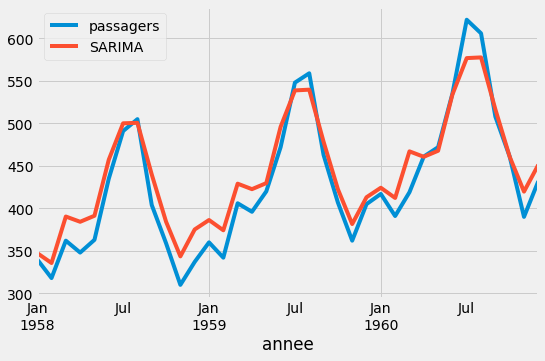

In [82]:
test['passagers'].plot(legend=True,figsize=(8,5))
predictions.plot(legend=True)


avec l'ensemble

Text(0.5, 1.0, 'RMSE: 23.8237')

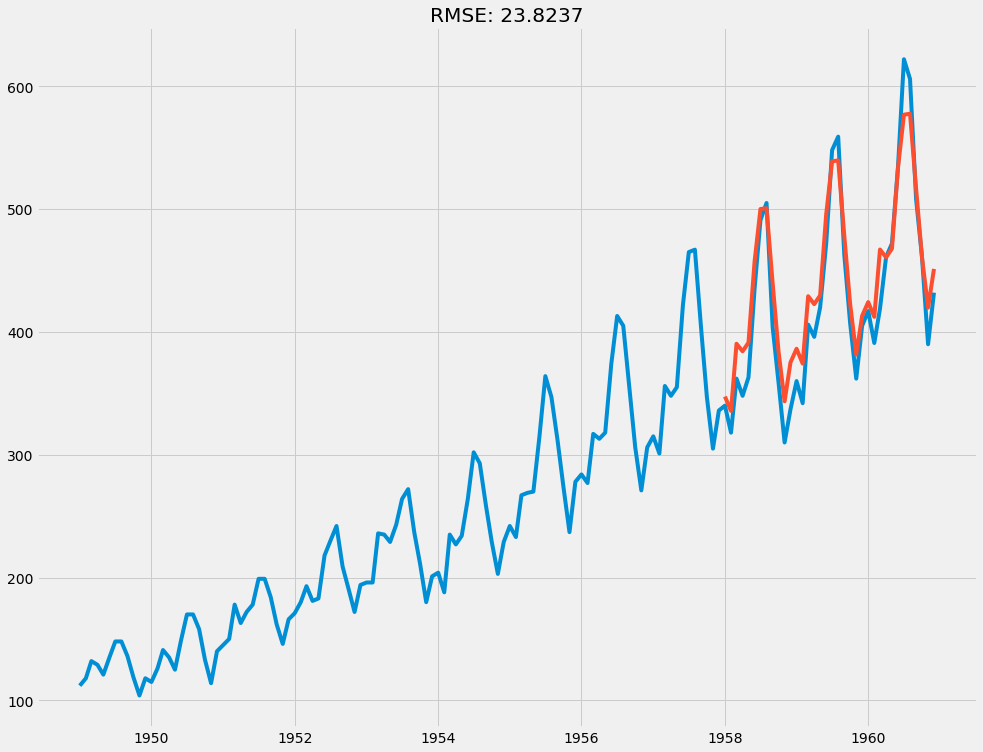

In [83]:
plt.plot(x)
plt.plot(predictions)
plt.title('RMSE: %.4f'% rmse)

In [84]:
evaluate_forecast(x[start_index:end_index], predictions)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.907234,20.25515,20.426973,567.570093,0.003385,NaN,23.82373


### <a name="autosarima">Auto SARIMA</a>

[auto_arima documentation for selecting best model](https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html)

In [85]:
#building the model
#from pyramid.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12, stepwise=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=706.671, Time=1.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=707.730, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=704.186, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=704.801, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=704.001, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=704.472, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=705.993, Time=0.39 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=705.691, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=705.081, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=704.376, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=707.075, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=705.875, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.350 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [86]:
start_index = test.index.min()
end_index = test.index.max()

#Predictions
pred = model.predict()

In [87]:
pred = model.predict(n_periods=len(test))
pred = pd.DataFrame(pred,index = test.index,columns=['Prediction'])

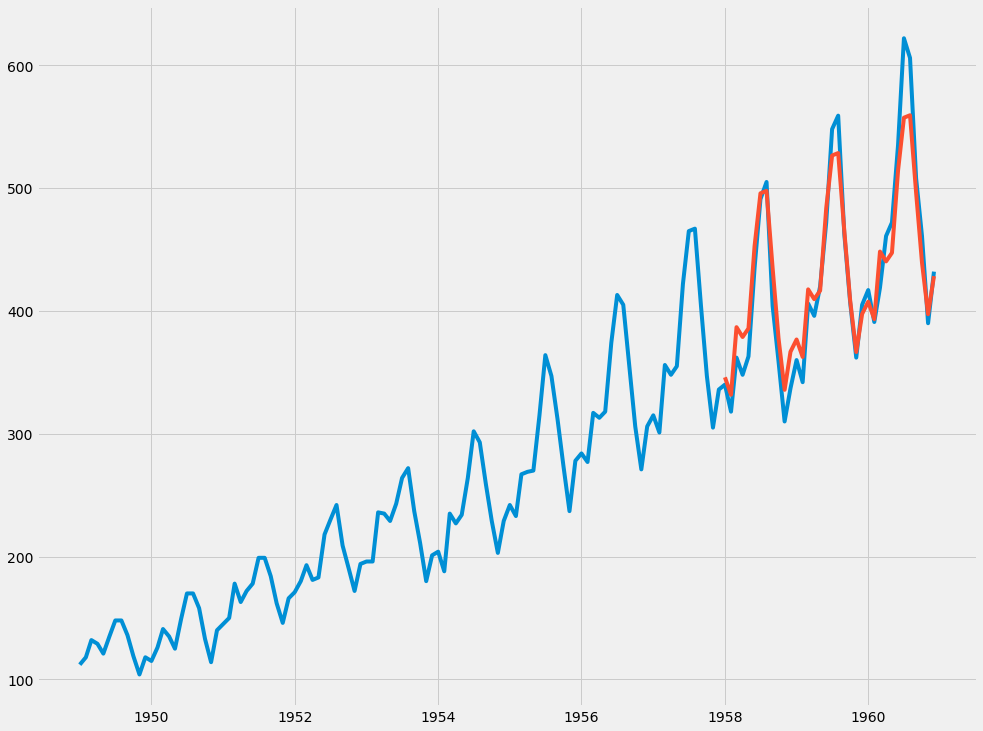

In [88]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
plt.plot(x.passagers, label='Train')
plt.plot(forecast, label='Prediction')
plt.show()

In [89]:
evaluate_forecast(x[start_index:end_index], forecast)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.919939,17.807808,17.259258,489.835904,0.00242,NaN,22.132237


### <a name="sarimagri">SARIMAX avec Grille</a>

In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Exemples de combinaisons de paramètres pour ARIMA saisonnier..')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemples de combinaisons de paramètres pour ARIMA saisonnier..
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**SARIMAX**

- L'implémentation est appelée SARIMAX au lieu de SARIMA car l'ajout d'un "X" au nom de la méthode signifie que l'implémentation supporte également les variables exogènes.
- Les variables exogènes sont facultatives et peuvent être spécifiées via l'argument "exog".
- modèle = SARIMAX(données, exog=autres_données, ...)
- Exemples de variables exogènes : Population, vacances, nombre de compagnies aériennes, événements majeurs



In [91]:
min_aic = 999999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            
            #le meilleur avec le plus petit AIC
            if results.aic < min_aic:
                min_aic = results.aic
                min_aic_model = results
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1484.6772209911371
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1237.4660178997467
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:942.3100937885073
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:794.687677276898
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:766.0933426224981
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:734.5115964400791
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:751.4556630229898
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:695.1505886529279
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1334.2309362006247
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1103.9259403992567
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:849.8996168083636
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:730.1765969829207
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:734.1078698440191
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:696.388649134507
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:719.7358056079725
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:659.693400496715
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:993.1312724630138
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:821.3813174845818
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:701.044518

In [92]:
min_aic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          passagers   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -299.422
Date:                            Sat, 13 Feb 2021   AIC                            606.844
Time:                                    20:33:30   BIC                            616.422
Sample:                                01-01-1949   HQIC                           610.687
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2600      0.098     -2.657      0.008      -0.452      -0.068
ar.S.L12      -0.6461      0.128     -5.047      0.000      -0.897      -0.395
ma.S.L12       0.6905      0.266      2.594      0.009       0.169       1.212
sigma2        87.3032     22.819      3.826      0.000      42.578     132.028
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.92   Prob(JB):                         0.27
Heteroskedasticity (H):               0.84   Skew:                             0.34
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX(0, 1, 1)x(1, 1, 1, 12) a été retenu

In [93]:
start_index = test.index.min()
end_index = test.index.max()

#Previsions
pred = min_aic_model.get_prediction(start=start_index,end=end_index, dynamic=False)

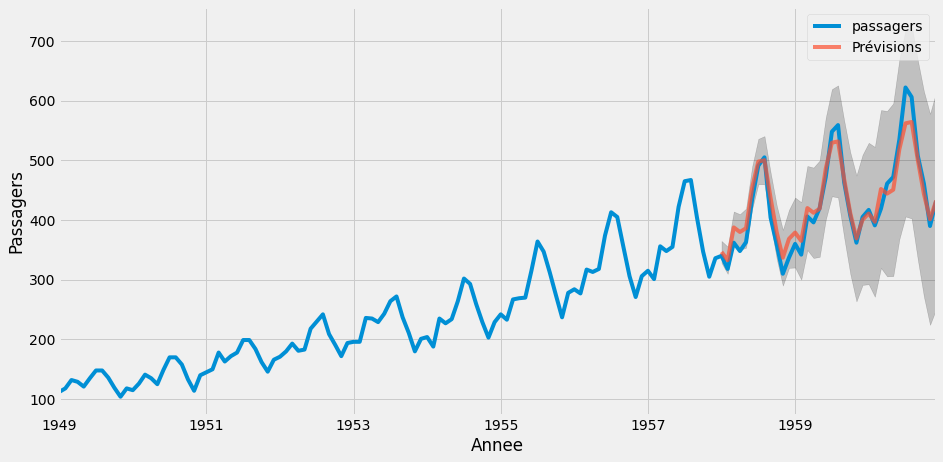

In [94]:
pred_ci = pred.conf_int()
ax = x['1949':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Prévisions', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Annee')
ax.set_ylabel('Passagers')
plt.legend()
plt.show()

Diagnostic du  modèle
- Notre principale préoccupation est de nous assurer que les résidus de notre modèle sont non corrélés et normalement distribués avec une moyenne nulle. 
- Si le modèle saisonnier ARIMA ne satisfait pas ces propriétés, c'est une bonne indication qu'il peut être encore amélioré.

Le diagnostic du modèle suggère que le résidu du modèle est normalement distribué sur la base de ce qui suit :

- Dans le graphique en haut à droite, la ligne rouge KDE suit de près la ligne d'une N(0,1). Où, N(0,1) est la notation standard pour une distribution normale avec une moyenne de 0 et un écart-type de 1. C'est une bonne indication, que les résidus sont normalement distribués. 
- Le diagramme Normal qq en bas à gauche montre que la distribution ordonnée des résidus (points bleus) suit la tendance linéaire des échantillons prélevés dans une distribution normale standard. Là encore, cela indique clairement que les résidus sont normalement distribués.
- Les résidus standardisées (graphique en haut à gauche) ne présentent pas de saisonnalité évidente et semblent être un bruit blanc. 
- Ceci est confirmé par le tracé d'autocorrélation (c'est-à-dire de corrélation) en bas à droite, qui montre que les résidus de la série temporelle ont une faible corrélation avec les versions décalées de celle-ci.

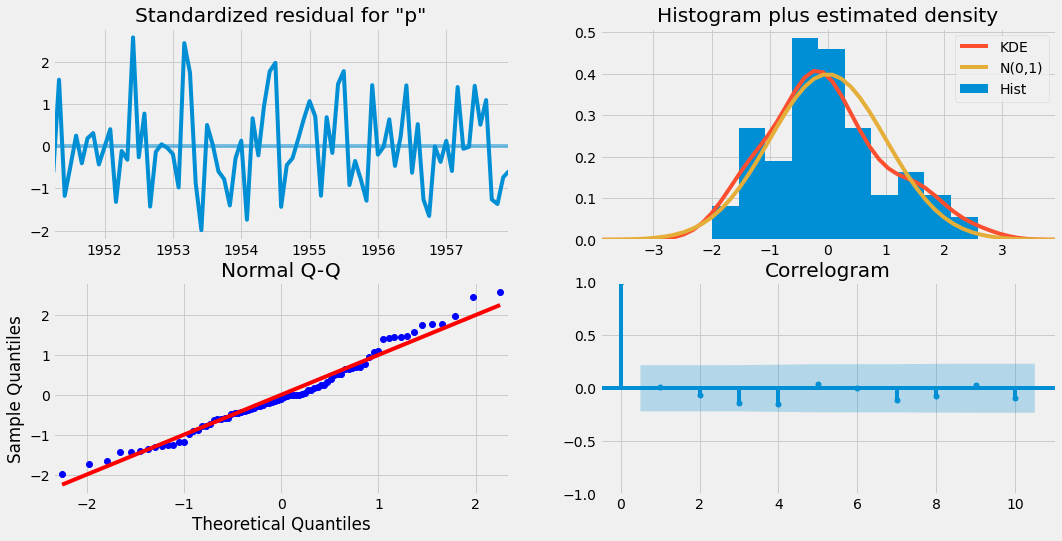

In [95]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [96]:
x_forecasted = pred.predicted_mean.values
x_truth = x[start_index:end_index].passagers.values
mse = ((x_forecasted - x_truth) ** 2).mean()
print('La MSE (Mean Squared Error) de nos prévisions est {}'.format(round(mse, 2)))

La MSE (Mean Squared Error) de nos prévisions est 469.83


In [97]:
print('La RMSE (Root Mean Squared Error) de notre prévisions est {}'.format(round(np.sqrt(mse), 2)))

La RMSE (Root Mean Squared Error) de notre prévisions est 21.68


In [98]:
evaluate_forecast(x_truth, x_forecasted)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.923208,17.717283,16.6924,469.834006,0.002447,4.20006,21.675655


# <a name="7">VII. Prévisions avec les Réseaux de Neurone Récurrent</a> 

## <a name="lstm"> LSTM  </a>

Le réseau de mémoire à long terme et à court terme, ou réseau LSTM Long Short Time Memory, est un réseau neuronal récurrent qui est formé en utilisant la rétropropagation dans le temps et qui surmonte le problème de la disparition du gradient.

En tant que tel, il peut être utilisé pour créer de grands réseaux récurrents qui, à leur tour, peuvent être utilisés pour résoudre des problèmes de séquences difficiles dans l'apprentissage machine et obtenir des résultats de pointe.

Au lieu de neurones, les réseaux LSTM ont des blocs de mémoire qui sont reliés par des couches.

Un bloc possède des composants qui le rendent plus intelligent qu'un neurone classique et une mémoire pour les séquences récentes. Un bloc contient des portes qui gèrent l'état et la sortie du bloc. Un bloc fonctionne sur une séquence d'entrée et chaque porte à l'intérieur d'un bloc utilise les unités d'activation sigmoïdes pour contrôler si elles sont déclenchées ou non, ce qui rend conditionnel le changement d'état et l'ajout d'informations circulant dans le bloc.

Il existe trois types de portes au sein d'une unité :

- Porte d'oubli : décide de manière conditionnelle des informations à jeter du bloc.
- Porte d'entrée : décide de manière conditionnelle quelles valeurs de l'entrée doivent mettre à jour l'état de la mémoire.
- Porte de sortie : décide de manière conditionnelle de ce qu'il faut sortir en fonction de l'entrée et de la mémoire du bloc.


**Réseau de LSTM pour la régression**

On peut dire que le problème est un problème de régression.

Autrement dit, étant donné le nombre de passagers (en milliers) ce mois-ci, quel sera le nombre de passagers le mois prochain ?

Nous pouvons écrire une fonction simple pour convertir notre unique colonne de données en un ensemble de données à deux colonnes : la première colonne contenant le nombre de passagers de ce mois (t) et la seconde colonne contenant le nombre de passagers du mois prochain (t+1), à prévoir.



In [99]:
import sklearn

On commence par normaliser notre série temporelle x qu'on recopie avant 

In [100]:
dataset=x.copy()
dataset = dataset.astype('float32')
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

On divise 70% train et 30% test

In [101]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


fonction create_dataset qui convertit le dataset en deux tableau de valeurs $dataX = X_t$ et $dataY = X_{t+1}$  à partir de $X_t$  on veut prédire $X_{t+1}$ 

In [102]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX),np.array(dataY)
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


On change les dimensions pour notre modèle LSTM 

In [103]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [104]:
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

Méttons en place notre modèle [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) avec 4 unités, une perte qui est la [MSE](#mse) et l'optimiseur [Adam.](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [105]:
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train , epochs=60, batch_size=1, verbose=2, validation_data=(X_test, y_test))

Epoch 1/60
98/98 - 4s - loss: 0.0416 - val_loss: 0.2255
Epoch 2/60
98/98 - 0s - loss: 0.0192 - val_loss: 0.1458
Epoch 3/60
98/98 - 0s - loss: 0.0149 - val_loss: 0.1234
Epoch 4/60
98/98 - 0s - loss: 0.0136 - val_loss: 0.1078
Epoch 5/60
98/98 - 0s - loss: 0.0126 - val_loss: 0.0946
Epoch 6/60
98/98 - 0s - loss: 0.0116 - val_loss: 0.0854
Epoch 7/60
98/98 - 0s - loss: 0.0106 - val_loss: 0.0700
Epoch 8/60
98/98 - 0s - loss: 0.0096 - val_loss: 0.0641
Epoch 9/60
98/98 - 0s - loss: 0.0086 - val_loss: 0.0544
Epoch 10/60
98/98 - 0s - loss: 0.0075 - val_loss: 0.0480
Epoch 11/60
98/98 - 0s - loss: 0.0066 - val_loss: 0.0372
Epoch 12/60
98/98 - 0s - loss: 0.0058 - val_loss: 0.0300
Epoch 13/60
98/98 - 0s - loss: 0.0050 - val_loss: 0.0270
Epoch 14/60
98/98 - 0s - loss: 0.0042 - val_loss: 0.0195
Epoch 15/60
98/98 - 0s - loss: 0.0036 - val_loss: 0.0184
Epoch 16/60
98/98 - 0s - loss: 0.0033 - val_loss: 0.0144
Epoch 17/60
98/98 - 0s - loss: 0.0029 - val_loss: 0.0126
Epoch 18/60
98/98 - 0s - loss: 0.0026 - 

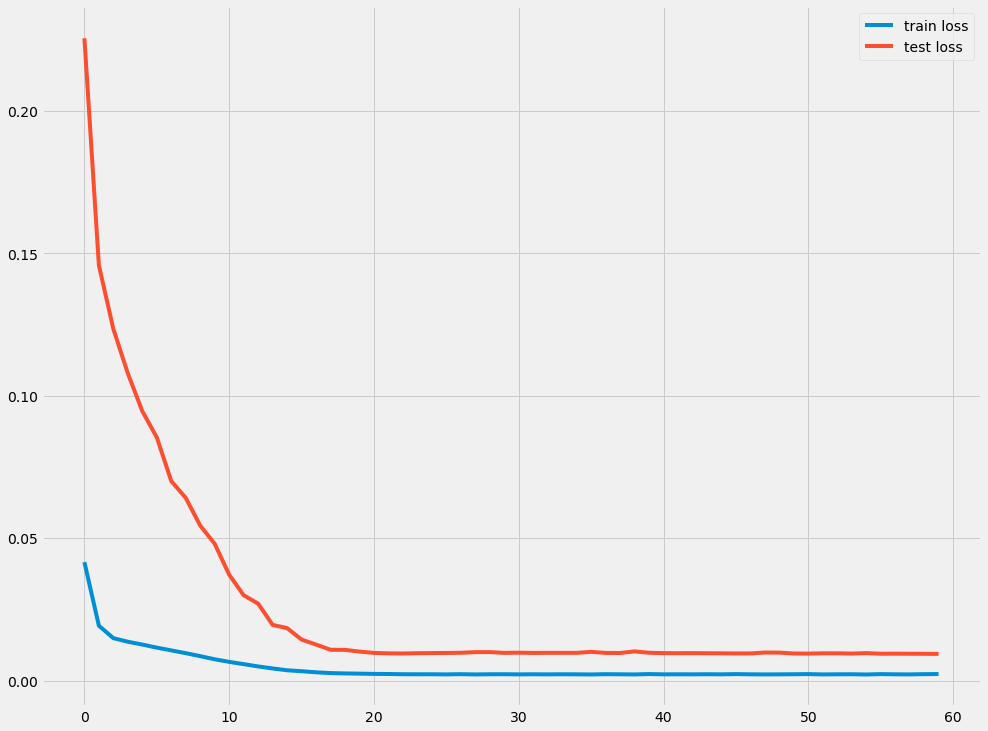

In [106]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [107]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_train = scaler.inverse_transform(y_train)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test = scaler.inverse_transform(y_test)

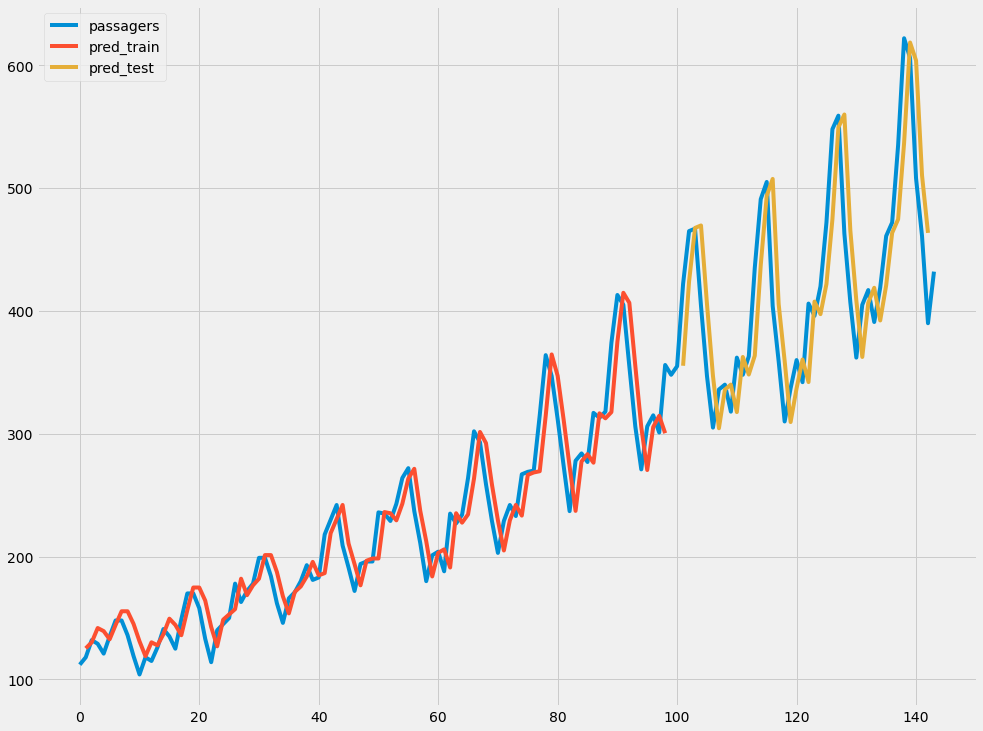

In [108]:
y_train_pred_plot = np.empty_like(dataset)
y_train_pred_plot[:, :] = np.nan
y_train_pred_plot[look_back:len(y_train_pred)+look_back, :] = y_train_pred
y_test_pred_plot = np.empty_like(dataset)
y_test_pred_plot[:, :] = np.nan
y_test_pred_plot[len(y_train_pred)+(look_back*2)+1:len(dataset)-1, :] = y_test_pred
plt.plot(scaler.inverse_transform(dataset), label='passagers')
plt.plot(y_train_pred_plot, label='pred_train')
plt.plot(y_test_pred_plot, label='pred_test')
plt.legend()
plt.show()

In [109]:
batch_size=1
import math
from sklearn.metrics import mean_squared_error


trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.71 RMSE
Test Score: 50.12 RMSE


In [110]:
evaluate_forecast(y_train, y_train_pred)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.893495,18.708347,16.002785,562.121155,0.010758,8.683298,23.709095


In [111]:
evaluate_forecast(y_test, y_test_pred)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.582218,42.318092,42.325577,2512.479736,0.013243,10.102313,50.124641


## <a name="gru"> GRU  </a>

Contrairement à LSTM, GRU: Gated Recurrent Unit, pour sa part dispose de deux portes et un état en sortie


- Porte de reset (reset gate)
    - Cette porte sert à contrôler combien d’information passée le réseau doit oublier. L’état caché précédent, concaténé avec les données d’entrée, passe par une sigmoïde (pour ne conserver que les coordonnées pertinentes) puis est multiplié par l’ancien état caché : on n’en conserve donc que les coordonnées importantes (telles qu’elles) de l’état précédent (on a donc perdu une partie de l’état précédent dans cette porte).

- Porte de mise à jour (update gate)
   - Cette porte agit exactement de la même manière que les portes oubli et d’entrée du LSTM : elle décide des informations à conserver et de celles à oublier.

Les données d’entrées et l’ancien état caché sont concaténés et passent par une fonction sigmoïde dont le rôle est de déterminer quelles sont les composantes importantes.

In [112]:
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [113]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

On reprend la même architecture du modele LSTM.

In [114]:
from keras.layers import GRU

In [115]:
model1 = Sequential()
model1.add(GRU(4, input_shape=(None,1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
history=model1.fit(X_train, y_train , epochs=60, batch_size=1, verbose=2, validation_data=(X_test, y_test))

Epoch 1/60
98/98 - 4s - loss: 0.0708 - val_loss: 0.3782
Epoch 2/60
98/98 - 0s - loss: 0.0324 - val_loss: 0.2570
Epoch 3/60
98/98 - 0s - loss: 0.0283 - val_loss: 0.2335
Epoch 4/60
98/98 - 0s - loss: 0.0260 - val_loss: 0.2089
Epoch 5/60
98/98 - 0s - loss: 0.0242 - val_loss: 0.1879
Epoch 6/60
98/98 - 0s - loss: 0.0225 - val_loss: 0.1759
Epoch 7/60
98/98 - 0s - loss: 0.0205 - val_loss: 0.1642
Epoch 8/60
98/98 - 0s - loss: 0.0194 - val_loss: 0.1590
Epoch 9/60
98/98 - 0s - loss: 0.0174 - val_loss: 0.1324
Epoch 10/60
98/98 - 0s - loss: 0.0162 - val_loss: 0.1218
Epoch 11/60
98/98 - 0s - loss: 0.0148 - val_loss: 0.1026
Epoch 12/60
98/98 - 0s - loss: 0.0135 - val_loss: 0.1020
Epoch 13/60
98/98 - 0s - loss: 0.0124 - val_loss: 0.0876
Epoch 14/60
98/98 - 0s - loss: 0.0110 - val_loss: 0.0817
Epoch 15/60
98/98 - 0s - loss: 0.0101 - val_loss: 0.0667
Epoch 16/60
98/98 - 0s - loss: 0.0087 - val_loss: 0.0660
Epoch 17/60
98/98 - 0s - loss: 0.0077 - val_loss: 0.0461
Epoch 18/60
98/98 - 0s - loss: 0.0067 - 

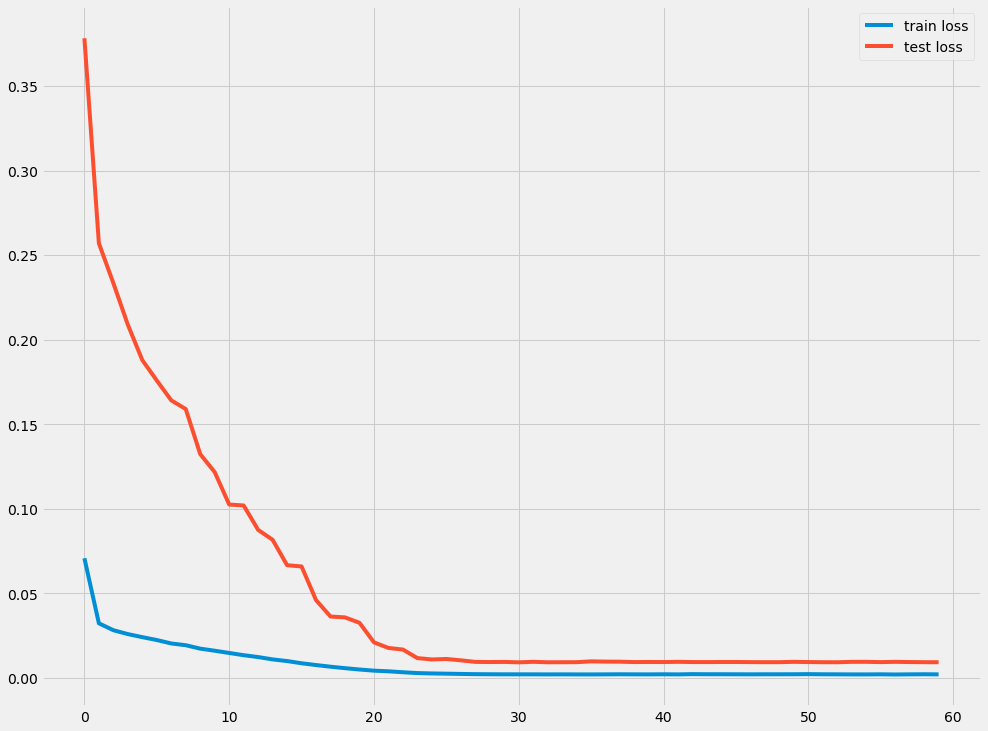

In [116]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [117]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_train = scaler.inverse_transform(y_train)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test = scaler.inverse_transform(y_test)

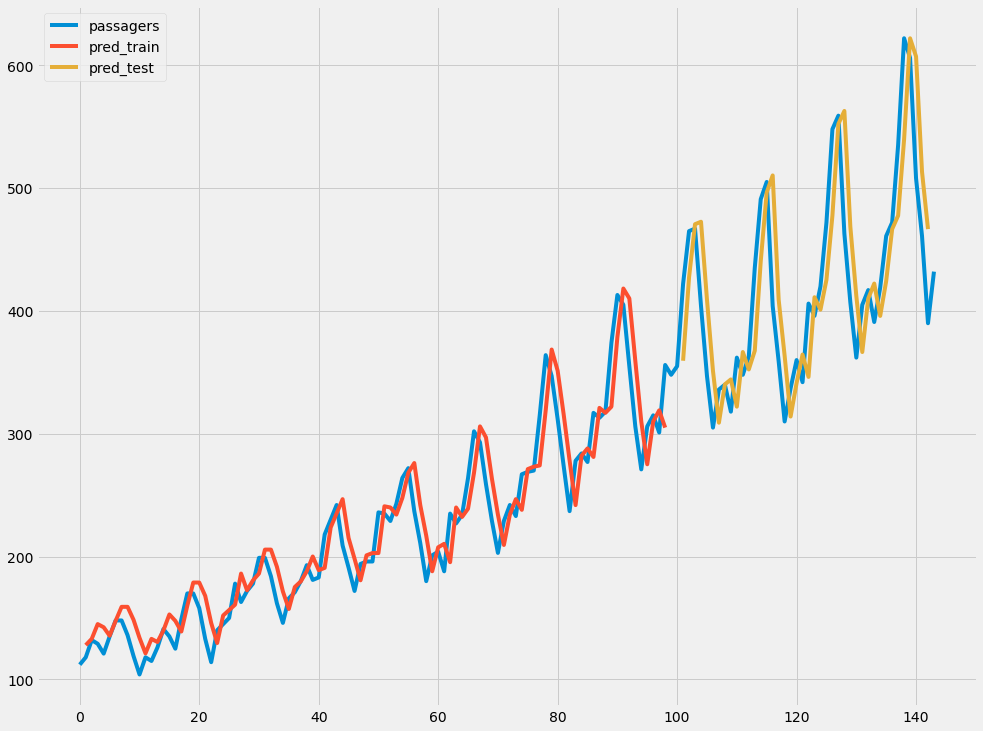

In [118]:
y_train_pred_plot = np.empty_like(dataset)
y_train_pred_plot[:, :] = np.nan
y_train_pred_plot[look_back:len(y_train_pred)+look_back, :] = y_train_pred
y_test_pred_plot = np.empty_like(dataset)
y_test_pred_plot[:, :] = np.nan
y_test_pred_plot[len(y_train_pred)+(look_back*2)+1:len(dataset)-1, :] = y_test_pred
plt.plot(scaler.inverse_transform(dataset), label='passagers')
plt.plot(y_train_pred_plot, label='pred_train')
plt.plot(y_test_pred_plot, label='pred_test')
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error


trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.15 RMSE
Test Score: 50.14 RMSE


In [120]:
evaluate_forecast(y_train, y_train_pred)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.889527,19.318533,16.703415,583.064148,0.011668,9.183303,24.146721


In [121]:
evaluate_forecast(y_test, y_test_pred)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,0.582044,41.879494,39.195053,2513.523926,0.013124,10.034861,50.135056


# <a name="8">Références</a>

- [Towards Data Science ARIMA Model Python Example Time Series Forecasting](https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7)
- [Openclassroom: Analysez et Modelisez des series temporelles](https://openclassrooms.com/fr/courses/4525371-analysez-et-modelisez-des-series-temporelles?status=published)
- [Yanick Goude: Projet Machine Learning pour la Prévision: séries temporelles](https://www.imo.universite-paris-saclay.fr/~goude/Materials/ProjetMLF/time_series.html)
- [Kaggle: International Airline Passengers: RNN](https://www.kaggle.com/mehmetkasap/rnn-international-airline-passengers)
- [Pensée Artificielle: LSTM et GRU](https://penseeartificielle.fr/comprendre-lstm-gru-fonctionnement-schema/)

- [Time series prediction lstm recurrent neural networks](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
